# Projekt końcowy Data Science 
### Dorota Gawrońska-Popa 

![ml_map](https://creditkarmacdn-a.akamaihd.net/res/content/reviews/lending-club-personal-loans/title.png)
źródło: https://www.lendingclub.com

## Lending Club 
to firma pożyczkowa typu peer-to-peer, która łączy pożyczkobiorców z inwestorami za pośrednictwem platformy internetowej. Obsługuje osoby, które potrzebują pożyczek osobistych w wysokości od 1000 do 40 000 USD. Pożyczkobiorcy otrzymują pełną kwotę udzielonej pożyczki pomniejszoną o opłatę początkową, która jest uiszczana firmie. Inwestorzy kupują weksle zabezpieczone osobistymi pożyczkami i płacą Lending Club opłatę za usługę. Firma Lending Club udostępnia dane o wszystkich pożyczkach udzielonych za pośrednictwem swojej platformy w określonych okresach.
Na potrzeby tego projektu zostały użyte dane dotyczące pożyczek udzielonych za pośrednictwem Lending Club na przestrzeni lat 2007 -2011. Każda pożyczka jest opatrzona informacją o tym, czy ostatecznie została spłacona (Fully Paid lub Charged Off w kolumnie loan_status). 

## Cele projektu
#### Polecenie
Twoim zadaniem jest zbudowanie modelu klasyfikacyjnego, który na podstawie tych danych będzie przewidywał z określoną dokładnością, czy potencjalny pożyczkobiorca spłaci swój dług z tytułu zaciągniętej pozyczki. Do zbioru danych dołączony jest plik z opisem wszystkich zmiennych oraz plik „FICO Score ranged.pdf”, w którym dokładnie opisano znaczenie jednej z kolumn.

### 1. Obróbka danych (Data Processing). 
Jako doświadczony Data Scientist zapewne znasz poszczególne kroki, które należy wykonać na tym etapie, więc nie będziemy ich tutaj wyszczególniać. W tej części masz do zdobycia 70 pkt.

### 2. EDA, czyli obszerna eksploracja danych. 
Opisz wnioski płynące z każdego wykresu, swoje hipotezy poprzyj testami statystycznymi takimi jak np. t-test lub Chi-square.

Dodatkowo odpowiedz na poniższe pytania:

- W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?
- W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO?
- W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?
- W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?
- W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?
- Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

Na tym etapie możesz zdobyć 100 pkt.

### 3. Feature Engineering – utwórz 20 nowych zmiennych (60 pkt)

### 4. Modelowanie (150 pkt):
- Wykonaj klasteryzację danych (wypróbuj do tego celu kilka metod, min. 3 i sprawdź, czy występują jakieś segmenty pożyczkobiorców, wykorzystaj odpowiednie metody do określenia optymalnej liczby klastrów (40 pkt)
- Wytrenuj 5 różnych modeli, wykorzystując do każdego inny algorytm, a następnie porównaj ich działanie, za metrykę oceny jakości modelu przyjmij AUROC score. (50pkt)
- Sprawdź działanie wcześniej użytych metod na skompresowanych danych za pomocą PCA, porównaj wyniki (AUROC score) z modelami wytrenowanymi w poprzednim podpunkcie. (20pkt)
- Zbuduj finalny model, którego AUROC score będzie >= 80%, pamiętaj o doborze istotnych zmiennych, kroswalidacji oraz dostrojeniu parametrów modelu, pomyśl również o zbalansowaniu klas. (40pkt)

Za całość do zdobycia jest 380 punktów. Do zaliczenia projektu potrzeba minimum 300 pkt.

## Import bibliotek

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import category_encoders as ce

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

## 1. Data processing

### Otwarcie i analiza obu plików .csv na komputerze
#### Usuwam pierwszy wiersz z linkiem z pliku Loan_data.csv, ostatni i puste kolumny z pliku LCDataDictionary.csv. 

In [2]:
lc_dict = pd.read_csv('LCDataDictionary.csv')
lc_dict.drop(lc_dict.columns[2:], inplace = True, axis = 1)
lc_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


#### Linki do opisu wszytskich kolumn

<a href="https://drive.google.com/file/d/1v2jeUwNHYGDpZyk22o9r89BU9gSWciuE/view?usp=sharing" >Link to LCDataDictionary_str1</a> 

<a href="https://drive.google.com/file/d/1V2LfsN1KXI8ezDObD2KLywhHa-fCIHBZ/view?usp=sharing" >Link to LCDataDictionary_str2</a>

<a href="https://drive.google.com/file/d/1aG5wo9tSzcn_YHNfRTNf8oGzB2qZ9FCc/view?usp=sharing" >Link to LCDataDictionary_str3</a>

#### Dane zasadnicze (pobrane bez pierwszego recordu z linkiem)

In [3]:
data_loan = pd.read_csv('Loan_data1.csv', header = 1, low_memory=False)
data_loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_loan.tail(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
42535,70686,NaN,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_loan.drop(index = 42536, axis=0, inplace=True)

In [6]:
data_loan.drop(index = 42537, axis=0, inplace=True)

In [7]:
data_loan.tail(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
42533,72176,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,NaN,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42535,70686,NaN,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.3+ MB


### Problem Charged Off

Charged OFF to odpis, jest to dług, na przykład na karcie kredytowej, którego odzyskanie przez kredytodawcę jest uważane za mało prawdopodobne, ponieważ po pewnym czasie pożyczkobiorca znacznie opóźnił spłatę należności. Jednak odpisanie nie oznacza całkowitego umorzenia długu. Spłata może oznaczać poważne konsekwencje dla historii kredytowej pożyczkobiorcy i przyszłej zdolności kredytowej.


#### Najważniejsze informacje

Odpis dotyczy długu, który według firmy nie będzie już ściągany, ponieważ pożyczkobiorca zalega z płatnościami.
Umorzenie długu nie oznacza, że konsument nie musi już go spłacać.
Po spłaceniu długu przez pożyczkodawcę może on sprzedać go zewnętrznej agencji windykacyjnej, która spróbuje pobrać go na koncie zaległych z płatnościami.
Konsument jest winien dług do czasu jego spłaty, uregulowania, umorzenia w postępowaniu upadłościowym lub, w przypadku postępowania sądowego, przedawnienia.

#### Jak działa odpis?

Odpisanie ma miejsce zwykle wtedy, gdy wierzyciel uznał, że niespłacony dług jest nieściągalny; zwykle następuje to po 180 dniach lub sześciu miesiącach braku płatności. Ponadto spłaty zadłużenia, które spadną poniżej wymaganej minimalnej spłaty za dany okres, zostaną również odpisane, jeżeli dłużnik nie uzupełni niedoboru. Kredytodawca wykreśla dług konsumenta jako nieściągalny i zaznacza go w raporcie kredytowym konsumenta jako umorzenie.

Skutkiem odpisu w raporcie kredytowym jest spadek zdolności kredytowej i trudności w uzyskaniu zgody na kredyt lub uzyskanie kredytu po przyzwoitym oprocentowaniu w przyszłości.

Spłata lub uregulowanie zaległego zadłużenia nie spowoduje usunięcia statusu odpisu z raportu kredytowego konsumenta. Zamiast tego status zostanie zmieniony na „odpis opłacony” lub „odpis rozliczony”. Tak czy inaczej, odpisy pozostają w raporcie kredytowym przez siedem lat, a strona poszkodowana będzie musiała albo poczekać siedem lat, albo negocjować z wierzycielem w celu usunięcia go po spłacie całego długu. 

Zródło https://www.investopedia.com/terms/c/chargeoff.asp

### Charged Off podsumowanie
Mówiąc w skrócie Charged Off nie jest jednoznaczne ze spłatą zadłużenia. Jest to niewykonanie zobowiązania w terminie + jakiś termin (180 dni lub 6 miesięcy), co wiąże się z tym, że pożyczkobiorca ma status pożyczki Charged Off, nawet jak po terminie zostanie uregulowana. 

W naszych danych jest kilkudziesięciu takich pożyczkobiorców, którzy ostatecznie spłacili pożyczkę, a mimo to mają ten status. Co pokażemy poniżej.

### TARGET loan_status

In [9]:
data_loan['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='count', ylabel='loan_status'>

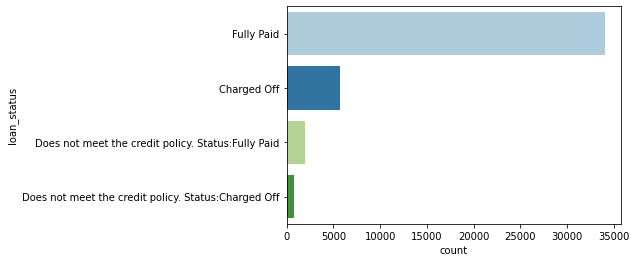

In [10]:
sns.countplot(y=data_loan['loan_status'], palette="Paired")

Po tym jak pożyczkobiorca nie spłacił z terminie kredytu, doszło w niektórych przypadkach do podpisania ugody. Tu mamy cechy zakończona, przerwana i aktywna. 

In [11]:
data_loan['loan_status'] = data_loan['loan_status'].replace({'Does not meet the credit policy. Status:Charged Off':'Charged Off'})
data_loan['loan_status'] = data_loan['loan_status'].replace({'Does not meet the credit policy. Status:Fully Paid':'Fully Paid'})
data_loan['loan_status'].value_counts()

Fully Paid     36104
Charged Off     6431
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='count', ylabel='settlement_status'>

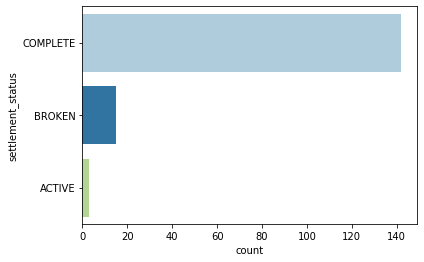

In [12]:
sns.countplot(y=data_loan['settlement_status'], palette="Paired")

#### Chcemy pokazać czy istnieją osoby, które mają utrzymany statut Charged Off mimo spłaty zadłużenia. 

In [13]:
data_loan[(data_loan.loan_status == 'Charged Off') & (data_loan.settlement_status == 'COMPLETE')][['loan_status','settlement_status']]

,loan_status,settlement_status
105,Charged Off,COMPLETE
188,Charged Off,COMPLETE
255,Charged Off,COMPLETE
362,Charged Off,COMPLETE
430,Charged Off,COMPLETE
...,...,...
41344,Charged Off,COMPLETE
41578,Charged Off,COMPLETE
41622,Charged Off,COMPLETE
41927,Charged Off,COMPLETE


Okazuje się, że w danych są 142 osoby, które mają status Charged Off i spłacone zobowiązanie. 

### Charged Off i Fully Paid

Na potrzeby tego projektu zakładamy już do końca, że mamy dwa statusy kredytu:
- Fully Paid - spłata pożyczki
- Charged Off - brak spłaty pożyczki

Informacje o rzeczywistym statusie omówionym powyżej, o ugodach i zawiłościach tej procedury, pomijamy w dalszej części naszej analizy. 

W późniejszej części połączymy statusy w dwie kategorie i wykonamy encoding. 

### Uzupełnianie pustych wartości, usuwanie niepotrzebnych kolumn...
W następnych krokach analizuję wszystkie kolumny (cechy). Dla wygody podglądam je kawałkami tabeli. 

In [14]:
data_loan.iloc[:5,:11]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group


In [15]:
data_loan.isna().sum()

id                           0
member_id                42536
loan_amnt                    1
funded_amnt                  1
funded_amnt_inv              1
                         ...  
settlement_status        42376
settlement_date          42376
settlement_amount        42376
settlement_percentage    42376
settlement_term          42376
Length: 151, dtype: int64

#### id, member_id, 

In [16]:
data_loan.drop(['member_id', 'id'], axis=1, inplace=True)

In [17]:
data_loan.dropna(axis=1, how='all', inplace=True)

In [18]:
data_loan.dropna(axis=0, how='all', inplace=True)

In [19]:
total = data_loan.isnull().sum().sort_values(ascending=False)
percent = (data_loan.isnull().sum()/data_loan.isnull().count()).sort_values(ascending=False)*100

missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent %"])
missing_data.head(25)

,Total,Percent %
settlement_term,42375,99.623839
settlement_amount,42375,99.623839
settlement_date,42375,99.623839
settlement_status,42375,99.623839
debt_settlement_flag_date,42375,99.623839
settlement_percentage,42375,99.623839
next_pymnt_d,39786,93.537087
mths_since_last_record,38884,91.416481
mths_since_last_delinq,26926,63.303162
desc,13293,31.251910


Odsetek brakujących danych w niektórych kolumnach i liczba tych kolumn są tak duże, że trudno je wszystkie przeanalizować. Będzie trzeba usunąć pewien procent kolumn, gdzie nulli jest powyżej jakiegoś procentu. Na początek usuwam kolumny, gdzie danych brakujących jest powyżej 90%.

In [20]:
data_loan.drop(['settlement_term', 'settlement_amount','settlement_date', 'settlement_status', 'debt_settlement_flag_date', 
                'settlement_percentage','next_pymnt_d', 'mths_since_last_record' ], axis=1, inplace=True)

#### int_rate 

In [21]:
data_loan.int_rate = pd.Series(data_loan.int_rate).str.replace('%', '').astype(float)
data_loan.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
42531    10.28
42532     9.64
42533     9.33
42534     8.38
42535     7.75
Name: int_rate, Length: 42535, dtype: float64

#### Zmienne kategoryczne: grade i sub_grade, home_ownership, verification_status oraz targetem loan_status 
zajmiemy się w późniejszej części 

In [22]:
data_loan.iloc[:5, 0:15]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid


In [23]:
data_loan.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2626
emp_length                     1112
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          13293
purpose                           0
title                            13
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
fico_range_low                    0
fico_range_high                   0
inq_last_6mths              

#### emp_title
Opisy zawodów mają 2626 wartości pustych, dodatkowo są tak zróżnicowane, to są opisy wpisywane przez pożyczkobiorców, także wszelkie relacje miedzy słowami czy frazami mogą dawać mylne wartości. Osoby mogły podawać swoje nazwy zawodów w sposób przekoloryzowany. Ta kolumna jest do usunięcia. 

In [24]:
data_loan.drop(['emp_title'], axis=1, inplace=True)

#### emp_length
Można zakładać, że ktoś kto nie ma wpisanej długości zatrudnienia, czy historii kredytowej jest młody, nie ma pracy, majątku, np. student, ale czy tak jest na pewno? 
Może 'purpose' pokaże czy to jest grupa studentów, czy niekoniecznie? Dla studenta pierwszym kredytem byłaby prawdopodobnie edukacja, np. kredyt na studia. 
W takiej sytuacji zamieniałabym nulle w tej zmiennej na 0, w przeciwym wypadku zamienię na modę (dominantę). 

In [25]:
data_loan.emp_length.isnull().sum()

1112

In [26]:
data_loan['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [27]:
data_loan[data_loan.emp_length.isna()].purpose

168      debt_consolidation
323      debt_consolidation
394        home_improvement
422          major_purchase
439      debt_consolidation
                ...        
40583               medical
40667                 other
40672                 other
40697    debt_consolidation
40731           educational
Name: purpose, Length: 1112, dtype: object

Celem kredytu nie jest edukacja, czyli niekoniecznie jest to student

In [28]:
data_loan.replace('n/a', np.nan, inplace=True)
data_loan["emp_length"]= data_loan["emp_length"].fillna(data_loan["emp_length"].mode()[0])
data_loan['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data_loan['emp_length'] = data_loan['emp_length'].astype(int)

In [29]:
data_loan['emp_length'].value_counts()

10    10481
1      8657
2      4743
3      4364
4      3649
5      3458
6      2375
7      1875
8      1592
9      1341
Name: emp_length, dtype: int64

#### annual_inc

Mamy 4 pozycje, które nie są wypełnione wysokością dochodu rocznego, zakładam, że dochód w annual_inc w pustych wartościach wynika z tego, że jest pomyłkowo niewpisany, uzupełniam wartością najczęściej występującą, czyli dominantą

In [30]:
data_loan.annual_inc.isnull().sum()

4

<AxesSubplot:>

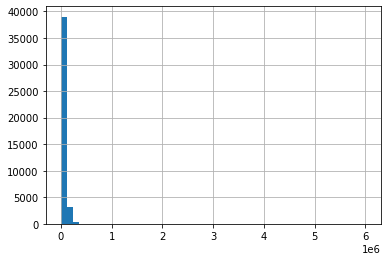

In [31]:
data_loan.annual_inc.hist(bins=50)

In [32]:
data_loan[data_loan.annual_inc.isna()].purpose

42450    other
42451    other
42481    other
42534    other
Name: purpose, dtype: object

In [33]:
data_loan.annual_inc.fillna(data_loan.annual_inc.mode()[0], inplace=True)
data_loan.annual_inc

0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
42531    180000.0
42532     12000.0
42533    110000.0
42534     60000.0
42535     70000.0
Name: annual_inc, Length: 42535, dtype: float64

In [34]:
data_loan.iloc[:5, 13:23]

,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs
0,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0
1,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0
2,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0
3,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0
4,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0


#### pymnt_plan, url, desc
Zmienne url, desc są tekstowe, bardzo róznorodne, nie dające bezpośredniej relacji z targetem. Zmienna pymnt_plan ma wszystkie jednakowe == n (no). 

In [35]:
data_loan[data_loan['pymnt_plan'] != 'n']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag


In [36]:
# Drop unneccesary column
data_loan.drop(['pymnt_plan','url','desc', 'funded_amnt_inv'], axis=1, inplace=True)

#### purpose, title, zip_code

In [37]:
print (data_loan.purpose.value_counts())

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64


In [38]:
print (data_loan.title.value_counts())

Debt Consolidation                 2259
Debt Consolidation Loan            1760
Personal Loan                       708
Consolidation                       547
debt consolidation                  532
                                   ... 
Debt Consolidation & Schooling        1
Clearing My Debt                      1
Consolidating Credit Card Debit       1
M3                                    1
Low interest loan                     1
Name: title, Length: 21264, dtype: int64


Purpose jest prawdopodobnie wybierane z listy rozwijanej przy składaniu wniosku, natomiast title jest opisem wnioskodawcy i podobnie jak desc nie daje wiążących relacji, bo często jest to 'radosna twórczość' wnioskodawcy. 

In [39]:
# usuniecie kolumny 'title' zrobię później
data_loan.drop(['zip_code'], axis=1, inplace=True)

#### deling_2yrs

Jest grupa recordów (29 pozycji), które są puste w kilku poniższych kolumnach. 
Ten wskażnik (deling_2yrs) to liczba przypadków przeterminowania o ponad 30 dni wpisanych w aktach kredytowych pożyczkobiorcy z ostatnich 2 lat. Można domniemywać, że skoro w 29 przypadkach to pole jest puste, to wartość powinna być zero, tu ta najczęściej występująca. Tym bardziej, że może to być grupa osób, które w większości wcześniej nie miały historii kredytowej. Trzy z tych osób nie spłaciły kredytu. Jedna z nich brała pożyczkę w celu konsolidacji, czyli musiała mieć jakąś historię kredytową. 

In [40]:
data_loan.delinq_2yrs.isnull().sum()

29

In [41]:
data_loan.delinq_2yrs.value_counts()

0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [42]:
data_loan[data_loan.delinq_2yrs.isnull()][['purpose', 'title']]

,purpose,title
42450,other,Moving expenses
42451,other,Education
42460,other,Paying medical bill
42473,other,Moving to Florida
42481,other,Moving expenses and security deposit
42484,other,New Bathroom
42495,other,Consolidate 2 high-interest rate loans
42510,debt_consolidation,Consolidate credit cards
42515,other,College Debt Consolidation
42516,other,Credit Card


In [43]:
df = data_loan[data_loan.delinq_2yrs.isnull()]['loan_status']
df.str.contains('Charged Off')

42450    False
42451    False
42460    False
42473    False
42481    False
42484    False
42495    False
42510    False
42515    False
42516    False
42517    False
42518    False
42519    False
42520    False
42521    False
42522     True
42523    False
42524    False
42525     True
42526    False
42527    False
42528    False
42529    False
42530     True
42531    False
42532    False
42533    False
42534    False
42535    False
Name: loan_status, dtype: bool

In [44]:
data_loan[data_loan.delinq_2yrs.isnull()].purpose == 'debt_consolidation'

42450    False
42451    False
42460    False
42473    False
42481    False
42484    False
42495    False
42510     True
42515    False
42516    False
42517    False
42518    False
42519    False
42520    False
42521    False
42522    False
42523    False
42524    False
42525    False
42526    False
42527    False
42528    False
42529    False
42530    False
42531    False
42532    False
42533    False
42534    False
42535    False
Name: purpose, dtype: bool

In [45]:
data_loan.delinq_2yrs.fillna(data_loan.delinq_2yrs.mode()[0], inplace=True)

#### earliest_cr_line, issue_d

Poniżej widać, że to są te same rekordy. To kolejna kolumna, która ma 29 nulli. Wśród nich trzy niespłacone kredyty. 3/29 do daje 1% niespłaconych. Ogólnie jest 42535 wszystkich pożyczek w tym 6431 niespłaconych, co daje podobny procent 0.015. 
Z jednej strony im dłużej spłacasz kredyty, tym jesteś wiarygodmiejszy. Ale im jesteś starszy, tym możesz szybciej stracić pracę lub być chory czy nawet umrzeć. Wzrasta prawdopodobieństwo Twojej niewypłacalności. Podobnie jak wyżej wydawałoby się, że to jest grupa młodych, studentów, bez kredytów i historii. Tymczasem są to ludzie, którzy mają hipoteki, biorą kredyt na nową łazienkę, wynajmują mieszkania, chcą skonsolidować kredyty... Uzupełnienie pustych wartości zrobię przez wartość mediany.

In [46]:
data_loan.groupby('loan_status')['loan_amnt'].count()

loan_status
Charged Off     6431
Fully Paid     36104
Name: loan_amnt, dtype: int64

In [47]:
data_loan.earliest_cr_line.isnull().sum()

29

In [48]:
data_loan[data_loan.earliest_cr_line.isnull()][['home_ownership', 'purpose', 'title']]

,home_ownership,purpose,title
42450,NONE,other,Moving expenses
42451,NONE,other,Education
42460,RENT,other,Paying medical bill
42473,RENT,other,Moving to Florida
42481,NONE,other,Moving expenses and security deposit
42484,MORTGAGE,other,New Bathroom
42495,RENT,other,Consolidate 2 high-interest rate loans
42510,MORTGAGE,debt_consolidation,Consolidate credit cards
42515,RENT,other,College Debt Consolidation
42516,RENT,other,Credit Card


In [49]:
data_loan[data_loan.earliest_cr_line.isna()].loan_status.value_counts()

Fully Paid     26
Charged Off     3
Name: loan_status, dtype: int64

In [50]:
data_loan['earliest_cr_line'].sample(5)

29770    Nov-1998
4109     Jan-1998
4165     Sep-1999
16221    Dec-1989
32649    Nov-2001
Name: earliest_cr_line, dtype: object

In [51]:
# Convert to date time
data_loan['earliest_cr_line'] = pd.to_datetime(data_loan['earliest_cr_line'])
data_loan['earliest_cr_line'].value_counts(ascending=False).head()

1999-10-01    393
1998-11-01    390
2000-10-01    370
1998-12-01    366
1997-12-01    348
Name: earliest_cr_line, dtype: int64

In [52]:
data_loan['issue_d'] = pd.to_datetime(data_loan['issue_d'])
data_loan['issue_d'].value_counts(ascending=False).head()

2011-12-01    2267
2011-11-01    2232
2011-10-01    2118
2011-09-01    2067
2011-08-01    1934
Name: issue_d, dtype: int64

In [53]:
data_loan['issue_d']= pd.to_datetime(data_loan['issue_d'])

In [54]:
data_loan['earliest_cr_line']= data_loan['earliest_cr_line'].fillna(data_loan['issue_d'])

In [55]:
data_loan.iloc[:5, 18:28]

,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,1985-01-01,735.0,739.0,1.0,NaN,3.0,0.0,13648.0,83.7%,9.0
1,1999-04-01,740.0,744.0,5.0,NaN,3.0,0.0,1687.0,9.4%,4.0
2,2001-11-01,735.0,739.0,2.0,NaN,2.0,0.0,2956.0,98.5%,10.0
3,1996-02-01,690.0,694.0,1.0,35.0,10.0,0.0,5598.0,21%,37.0
4,1996-01-01,695.0,699.0,0.0,38.0,15.0,0.0,27783.0,53.9%,38.0


#### fico_range_low i fico_range_high

Oddzielne zakresy fico nie są przydatne, są skorelowane na 1, stworzyłam nową kolumnę ze średnią z fico i usuwam kolumny zakresów dolnego i górnego. 

In [56]:
data_loan[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,42535.000000,42535.000000
mean,713.052545,717.052545
std,36.188439,36.188439
min,610.000000,614.000000
25%,685.000000,689.000000
50%,710.000000,714.000000
75%,740.000000,744.000000
max,825.000000,829.000000


In [57]:
data_loan[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


In [58]:
data_loan['fico_mean'] = (data_loan.fico_range_low + data_loan.fico_range_high)/2

In [59]:
data_loan.drop(['fico_range_low','fico_range_high'],1, inplace=True)

#### inq_last_6mths
Ta sama grupa 29 rekordów, o których jednoznacznie nie można powiedzieć, czy mają dochody, czy mieli wcześniej kredyty, czy zwlekali z płaceniem rat. Uzupełniam jak poprzednio mode. Ten wskaźnik to liczba zapytań.

In [60]:
data_loan.inq_last_6mths.isnull().sum()

29

In [61]:
data_loan['inq_last_6mths'].value_counts()

0.0     19657
1.0     11247
2.0      5987
3.0      3182
4.0      1056
5.0       596
6.0       339
7.0       182
8.0       115
9.0        50
10.0       24
12.0       15
11.0       15
15.0        9
14.0        6
13.0        6
18.0        4
16.0        3
24.0        2
17.0        2
19.0        2
28.0        1
33.0        1
27.0        1
31.0        1
25.0        1
32.0        1
20.0        1
Name: inq_last_6mths, dtype: int64

In [62]:
data_loan['inq_last_6mths'].median()

1.0

In [63]:
data_loan['inq_last_6mths'].mode()[0]

0.0

In [64]:
data_loan['inq_last_6mths'].mean()

1.0814237989930833

In [65]:
data_loan['inq_last_6mths'] = data_loan['inq_last_6mths'].fillna(data_loan['inq_last_6mths'].mode()[0])

#### mths_since_last_delinq

Wskaźnik, który mówi o liczbie m-cy od ostatniej zaległości. Wartości brakujących jest ponad 26 tys, czyli ponad połowa 63%. Uzupełniam medianą - wartością środkową. Tymczasem zostawiam tę kolumnę, ale liczba pustych wartości wskazuje na jej usunięcie. 

In [66]:
data_loan.mths_since_last_delinq.isnull().sum()

26926

In [67]:
data_loan['mths_since_last_delinq'].value_counts()

0.0      821
30.0     270
23.0     266
19.0     266
15.0     263
        ... 
115.0      1
106.0      1
120.0      1
95.0       1
85.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [68]:
data_loan['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

In [69]:
data_loan['mths_since_last_delinq'].median()

33.0

In [70]:
data_loan['mths_since_last_delinq'].mode()[0]

0.0

In [71]:
data_loan['mths_since_last_delinq'] = data_loan['mths_since_last_delinq'].fillna(data_loan['mths_since_last_delinq'].median())

#### open_acc
Ta sama grupa 29 rekordow, tu liczba otwartych lini (rachunków) kredytowych. Podobnie jak wcześniej, można przypuszczać, że ich nie ma, czyli powinnam uzupełnić zerami, ale jednak są wśród klienci, którzy konsolidują kredyty. Czyli musieli mieć otwarte inne rachunki kredytowe.  

In [72]:
data_loan.open_acc.isnull().sum()

29

In [73]:
data_loan['open_acc'].mode()[0]

7.0

In [74]:
data_loan['open_acc'].median()

9.0

In [75]:
data_loan['open_acc'].mean()

9.343951442149343

In [76]:
data_loan['open_acc'].value_counts()

7.0     4252
8.0     4176
6.0     4172
9.0     3922
10.0    3386
5.0     3368
11.0    2944
4.0     2508
12.0    2398
13.0    2060
3.0     1608
14.0    1597
15.0    1290
16.0    1022
17.0     812
2.0      692
18.0     588
19.0     442
20.0     335
21.0     276
22.0     170
23.0     121
24.0      87
25.0      63
26.0      40
1.0       39
28.0      29
27.0      29
30.0      17
29.0      16
31.0      13
34.0       8
32.0       6
33.0       5
35.0       4
38.0       2
36.0       2
41.0       1
46.0       1
39.0       1
47.0       1
44.0       1
37.0       1
42.0       1
Name: open_acc, dtype: int64

In [77]:
data_loan['open_acc']= data_loan['open_acc'].fillna(data_loan['open_acc'].mode()[0])

#### pub_rec

Ta sama grupa rekordów. 29 pustych. Ta cecha mówi o liczbie rejestrów, gdzie zostali wpisani klienci nierzetelni. Podobnie uzupełniam modą.

In [78]:
data_loan['pub_rec'].median()

0.0

In [79]:
data_loan['pub_rec'].mode()[0]

0.0

In [80]:
data_loan['pub_rec']= data_loan['pub_rec'].fillna(data_loan['pub_rec'].mode()[0])

#### revol_util
Stopa procentowa wykorzystania lini kredytowej. Im mniej wykorzystane tym mniejsza kwota do spłaty, zatem pewnie im mniejsza tendencja do niespłacania. To jest wartość numeryczna, do uzupełnienia nulli wykorzystam medianę. 

In [81]:
data_loan.revol_util.isnull().sum()

90

In [82]:
data_loan.revol_util = pd.Series(data_loan.revol_util).str.replace('%', '').astype(float)

In [83]:
data_loan['revol_util'].value_counts(ascending=False)

0.00      1070
40.70       65
0.20        64
63.00       63
66.60       62
          ... 
25.33        1
29.53        1
52.58        1
100.50       1
33.29        1
Name: revol_util, Length: 1119, dtype: int64

In [84]:
data_loan['revol_util']= data_loan['revol_util'].fillna(data_loan['revol_util'].median())

In [85]:
data_loan.iloc[:5, 26:37]

,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d
0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015
1,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013
2,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014
3,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015
4,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-2017


#### total_acc
Całkowita liczba lini kredytowych. Znowu z grupy tych 29 recordów, uzupełniam medianą.

In [86]:
data_loan['total_acc']= data_loan['total_acc'].fillna(data_loan['total_acc'].median())

#### usuwanie innych kolumn, 
Cechy, które mają jednakowe wartości lub nie mają lub mają mały wpływ na pożyczkobiorcę, czy spłaci czy nie kredyt. 
initial_list_status - same 'f'; out_prncp - same zera; out_prncp_inv - same zera; total_pymnt, total_pymnt_inv, total_rec_prncp i total_rec_int, recoveries, collection_recovery_fee, collection_recovery_fee. I title. funded_amnt_inv dotyczy sfinansowania kredytu przez inwestorów. Część z tych kolumn ma pojedyncze jednakowe wartości collections_12_mths_ex_med - 0 

In [87]:
data_loan.drop(['initial_list_status', 'total_pymnt_inv', 'out_prncp', 'out_prncp_inv', 'title'], 1, inplace=True)

Nad tymi pozycjami się zastanawiam czy je badać, hipotetycznie można uważać, że jak ktoś już ma spłaconą
prawie całą pożyczkę, to ma większą chęć już domknąć ten temat i spłacić całość. Czyli można znaleźć kontekst. 
Tymczasem je usuwam. 

In [88]:
data_loan.drop([ 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', ], 1, inplace=True)

In [89]:
data_loan.iloc[:5, 37:44]

,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,fico_mean
0,0.0,0.0,N,Cash,N,737.0
1,0.0,0.0,N,Cash,N,742.0
2,0.0,0.0,N,Cash,N,737.0
3,0.0,0.0,N,Cash,N,692.0
4,0.0,0.0,N,Cash,N,697.0


In [90]:
data_loan['collections_12_mths_ex_med'].value_counts()

0.0    42390
Name: collections_12_mths_ex_med, dtype: int64

In [91]:
data_loan.drop(['collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 'last_credit_pull_d', 
                'collections_12_mths_ex_med'], 1, inplace=True)

#### last fico_range_low i last fico_range_high
Oddzielne zakresy last_fico nie są przydatne, stworzyłam nową kolumnę ze średnią z last_fico i usuwam kolumny zakresów dolnego i górnego. Nie mam wiedzy, kiedy zostają wyliczane te last_fico, bo jeśli po spłacie kredytu, to nie mają wpływu na nasz target i można je usunąć. Dziwne jest to, że minimalna wartość obu zakresów to 0, czyli są wartości wisane jako 0.   

In [92]:
data_loan[['last_fico_range_high','last_fico_range_low' ]].describe()

,last_fico_range_high,last_fico_range_low
count,42535.000000,42535.000000
mean,689.922511,676.952039
std,80.818099,119.647752
min,0.000000,0.000000
25%,644.000000,640.000000
50%,699.000000,695.000000
75%,749.000000,745.000000
max,850.000000,845.000000


In [93]:
data_loan[['last_fico_range_high','last_fico_range_low' ]].corr()

,last_fico_range_high,last_fico_range_low
last_fico_range_high,1.000000,0.852463
last_fico_range_low,0.852463,1.000000


In [94]:
data_loan['last_fico_mean'] = (data_loan.last_fico_range_low + data_loan.last_fico_range_high)/2

In [95]:
data_loan.drop(['last_fico_range_low','last_fico_range_high'],1, inplace=True)

#### acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens
To jest Liczba rachunków, wartość odpisów bankowych, wartość zadłużenia, liczba zastawów podatkowych, to są wartości, które nie mają wpływu na pożyczkobiorcę i jego wolę spłacania lub nie.  
policy_cod - 1, application_type - individual

In [96]:
data_loan['policy_code'].value_counts()

1.0    42535
Name: policy_code, dtype: int64

In [97]:
data_loan['application_type'].value_counts()

Individual    42535
Name: application_type, dtype: int64

In [98]:
data_loan['tax_liens'].value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [99]:
data_loan['disbursement_method'].value_counts()

Cash    42535
Name: disbursement_method, dtype: int64

In [100]:
data_loan['acc_now_delinq'].value_counts()

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

In [101]:
data_loan['chargeoff_within_12_mths'].value_counts()

0.0    42390
Name: chargeoff_within_12_mths, dtype: int64

In [102]:
data_loan['delinq_amnt'].value_counts()

0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64

#### debt_settlement_flag
To jest oznaczenie, czy pożyczkobiorca współpracuje czy nie z firmą windykacyjną, czy jest ugoda

In [103]:
data_loan['debt_settlement_flag'].value_counts()

N    42375
Y      160
Name: debt_settlement_flag, dtype: int64

In [104]:
data_loan['hardship_flag'].value_counts()

N    42535
Name: hardship_flag, dtype: int64

In [105]:
data_loan.drop(['policy_code', 'application_type','acc_now_delinq','chargeoff_within_12_mths',
                'delinq_amnt','tax_liens','disbursement_method','debt_settlement_flag','hardship_flag'],1, inplace=True)

#### pub_rec_bankruptcies

In [106]:
data_loan['pub_rec_bankruptcies'].value_counts().sort_index()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [107]:
data_loan['pub_rec_bankruptcies'].median()

0.0

In [108]:
data_loan['pub_rec_bankruptcies']= data_loan['pub_rec_bankruptcies'].fillna(data_loan['pub_rec_bankruptcies'].mode()[0])

## 2. EDA eksploracja danych 

Fully Paid     36104
Charged Off     6431
Name: loan_status, dtype: int64


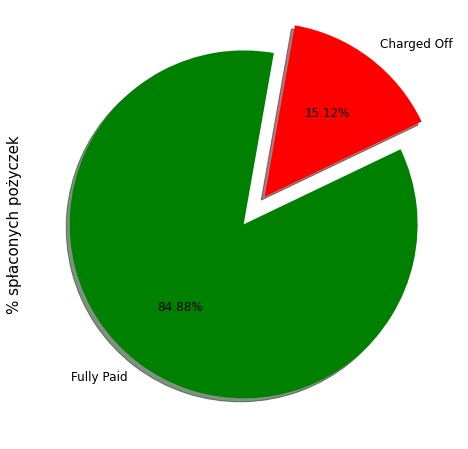

In [109]:
print(data_loan["loan_status"].value_counts())

# Slice data frame into good and bad loan status
df_good = data_loan.loc[(data_loan.loan_status == 0), :]
df_bad  = data_loan.loc[(data_loan.loan_status == 1), :]

plt.figure(figsize=(16, 8))
colors = ["g", "r"]
labels = "Fully Paid", "Charged Off"
data_loan["loan_status"].value_counts().plot.pie(explode=[0,0.2], autopct='%1.2f%%', 
                                                 shadow=True, colors=colors, labels=labels, 
                                                 fontsize=12, startangle=80)
plt.ylabel('% spłaconych pożyczek', fontsize=15)
plt.show()

### Wniosek:
Na podstawie przedstawionego wykresu widać, że mamy 15 % niespłaconych pożyczek, a prawie 85 % spłaconych, co oznacza, że prawie 6 razy więcej osób spłacało pożyczki zgodnie z zasadami Lending Page.  

### FICO Rating

Jest pięć grup skoringowych FICO. Poor: < 580, Fair 580-669, Good 670-739, Very Good 740-799 i Exceptional >= 800. Bedziemy przedstawiać zależności czynników versus FICO skoring.  

In [110]:
data_loan.fico_mean.head()

0    737.0
1    742.0
2    737.0
3    692.0
4    697.0
Name: fico_mean, dtype: float64

![ml_map](https://lessdebt.com/wp-content/uploads/2017/12/FICO-Credit-Score-Ranges.png)

In [111]:
def fico_rating (row):
    if row['fico_mean'] < 580:
        return 'Poor'
    if row['fico_mean'] < 670:
        return 'Fair'
    if row['fico_mean'] < 740:
        return 'Good'
    if row['fico_mean'] < 800:
        return 'Very Good'
    if row['fico_mean']  >= 800:
       return 'Exceptional'
    return 'Other'
data_loan['fico_rating'] = data_loan.apply (lambda row: fico_rating(row), axis=1)
data_loan[['loan_amnt','emp_length','annual_inc','fico_mean','int_rate', 'fico_rating']]

,loan_amnt,emp_length,annual_inc,fico_mean,int_rate,fico_rating
0,5000.0,10,24000.0,737.0,10.65,Good
1,2500.0,1,30000.0,742.0,15.27,Very Good
2,2400.0,10,12252.0,737.0,15.96,Good
3,10000.0,10,49200.0,692.0,13.49,Good
4,3000.0,1,80000.0,697.0,12.69,Good
...,...,...,...,...,...,...
42531,3500.0,1,180000.0,687.0,10.28,Good
42532,1000.0,1,12000.0,697.0,9.64,Good
42533,2525.0,1,110000.0,712.0,9.33,Good
42534,6500.0,1,60000.0,742.0,8.38,Very Good


### Pytanie a. (FICO vel loan_status)

In [112]:
ficoloan = ['loan_status', 'fico_rating']
cm = sns.light_palette("orange", as_cmap=True)
round(pd.crosstab(data_loan[ficoloan[0]], data_loan[ficoloan[1]], 
            normalize='index'),2).fillna(0).style.background_gradient(cmap = cm)

fico_rating,Exceptional,Fair,Good,Very Good
loan_status,,,,
Charged Off,0.010000,0.150000,0.710000,0.140000
Fully Paid,0.020000,0.080000,0.650000,0.260000


Text(0.5, 1.0, 'Zależność spłacalności pożyczki versus FICO')

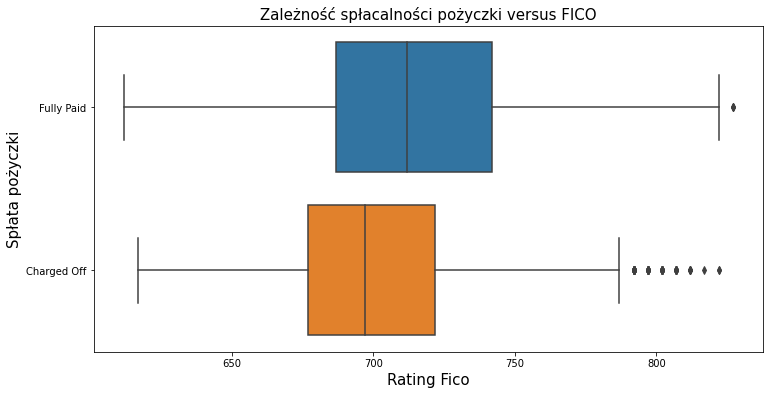

In [113]:
fig = plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data_loan, x="fico_mean", y="loan_status")
plt.xlabel("Rating Fico", fontsize=15)
plt.ylabel("Spłata pożyczki", fontsize=15)
plt.title("Zależność spłacalności pożyczki versus FICO", fontsize=15)

### Wniosek:
Na podstawie przedstawionych wykresów wnioskuję, iż więcej pożyczek jest spłaconych przez pożyczkobiorców z wyższym Fico (exceptional i very good). Pożyczkobiorcy o dobrym i średnim Fico częściej nie spłacąja pożyczek. Fico powyżej 780 to pożyczkobiorcy bardzo dobrze spłacający kredyty. 
Zdecydowana większość udzielanych pożyczek dla Fico powyżej 670. Pierwszy kwartyl, średnia i trzeci kwartyl są wyższe dla pożyczkobiorców z lepszym Fico. 

### Pytanie b. (earliest_cr_line vel loan_status)

In [114]:
data_loan['earliest_cr_line']= pd.to_datetime(data_loan['earliest_cr_line']).apply(lambda x: int(x.strftime('%Y')))
data_loan['earliest_cr_line']

0        1985
1        1999
2        2001
3        1996
4        1996
         ... 
42531    2007
42532    2007
42533    2007
42534    2007
42535    2007
Name: earliest_cr_line, Length: 42535, dtype: int64

Text(0, 0.5, 'Historia kredytowa')

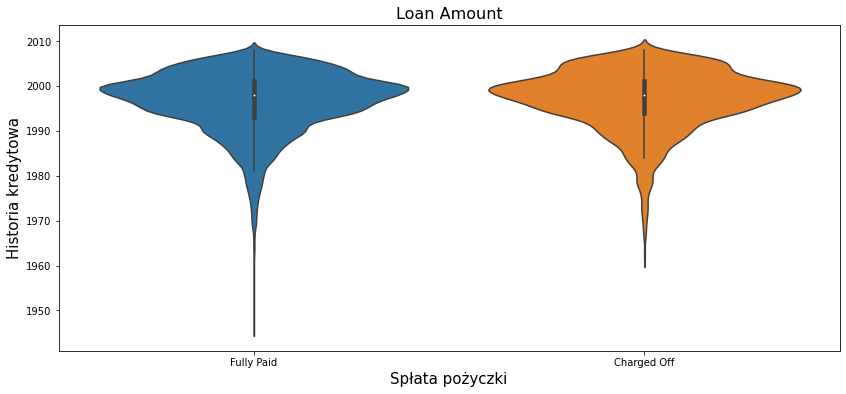

In [115]:
fig = plt.figure(figsize=(14,6))
sns.violinplot(x="loan_status", y="earliest_cr_line", data=data_loan, split=True)
plt.title("Loan Amount", fontsize=16)
plt.xlabel("Spłata pożyczki", fontsize=15)
plt.ylabel("Historia kredytowa", fontsize=15)

### Wniosek:
Na podstawie przedstawionego wykresu widać, że Ci najstarsi klienci spłacają kredyty częściej, choć jest ich znikoma ilość. W znaczącej wielkości wszystkich pożyczkobiorców, wiek już nie ma specjalnego znaczenia. 

### Pytanie c. (home_ownership vel loan_status)

In [116]:
homeloan = ['loan_status', 'home_ownership']
cm = sns.light_palette( "orange", as_cmap=True)
round(pd.crosstab(data_loan[homeloan[0]], data_loan[homeloan[1]], 
            normalize='index'),2).fillna(0).style.background_gradient(cmap = cm)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,0.420000,0.000000,0.000000,0.080000,0.500000
Fully Paid,0.450000,0.000000,0.000000,0.080000,0.470000


<Figure size 576x432 with 0 Axes>

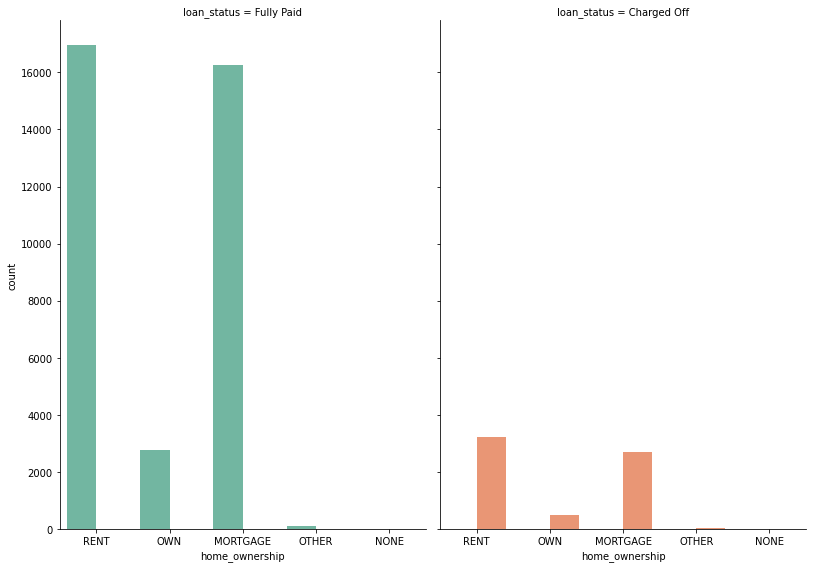

In [117]:
plt.figure(figsize = (8,6))
g = sns.catplot(x="home_ownership", hue="loan_status", col="loan_status", data=data_loan, kind="count", 
                height=8, aspect=.7, palette='Set2')

### Wniosek:
Na podstawie przedstawionych wykresów wnioskuję, iż w każdej grupie pożyczkobiorców (spłacających lub nie) podobnie rozkładają się wyniki. Z tabelki powyżej widać, iż ciut więcej jest osób z kredytem hipotecznym, które spłaciły pożyczkę, a odwrotnie przy mieszkaniu wynajętym. Właściwie brak danych o pożyczkobiorcach w kategoriach 'Other' i 'None'.

### Pearson’s Chi-Square Test

Ponieważ mamy dwie zmienne kategoryczne zastosujemy Chi-Square Test. Sprawdzimy czy jest zależność pomiędzy tymi zmiennymi.
- H0 - hipoteza zerowa "Nie ma zależności między statusem mieszkania a spłatą pożyczki"
- H1 - hipoteza alternatywna "Są znaczące relacje między zmiennymi"

In [118]:
data_cross = pd.crosstab(data_loan['home_ownership'], data_loan['loan_status'])
print(data_cross)

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2699       16260
NONE                      1           7
OTHER                    29         107
OWN                     495        2756
RENT                   3207       16974


In [119]:
stat, p_value, dof, expected = chi2_contingency(data_cross)
alpha = 0.05
print(p_value)

4.922904146937375e-05


In [120]:
if p_value <= alpha: 
    print('Odrzucamy hipotezę HO - Są znaczące relacje między zmiennymi') 
else: 
    print('Akceptujemy hipotezę zerową HO - Nie ma zależności między statusem mieszkania a spłatą pożyczki') 

Odrzucamy hipotezę HO - Są znaczące relacje między zmiennymi


### Pytanie d. (annual_income vel loan_status)

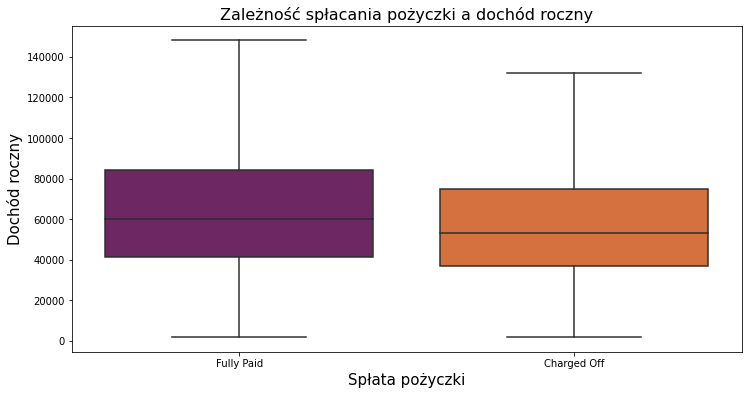

In [121]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(x="loan_status", y="annual_inc",  data=data_loan, showfliers=False, palette="inferno")
ax = plt.title('Zależność spłacania pożyczki a dochód roczny', fontsize=16)
ax = plt.xlabel('Spłata pożyczki', fontsize=15)
ax = plt.ylabel('Dochód roczny', fontsize=15)

### Wniosek:
Na podstawie przedstawionego wykresu widać, że średnia wysokość dochodu rocznego jest wyższa u klientów spłacającyh swoje pożyczki. Ci z najwyższym dochodem spłacają swoje pożyczki. 

### Pytanie e. (emp_length vel loan_status)

In [122]:
emplenght = ['loan_status', 'emp_length']
cm = sns.light_palette("gray", as_cmap=True)
round(pd.crosstab(data_loan[emplenght[0]], data_loan[emplenght[1]], 
            normalize='index'),2).fillna(0).style.background_gradient(cmap = cm)

emp_length,1,2,3,4,5,6,7,8,9,10
loan_status,,,,,,,,,,
Charged Off,0.200000,0.100000,0.100000,0.080000,0.080000,0.050000,0.050000,0.040000,0.030000,0.270000
Fully Paid,0.200000,0.110000,0.100000,0.090000,0.080000,0.060000,0.040000,0.040000,0.030000,0.240000


Text(0, 0.5, 'Spłata pożyczki')

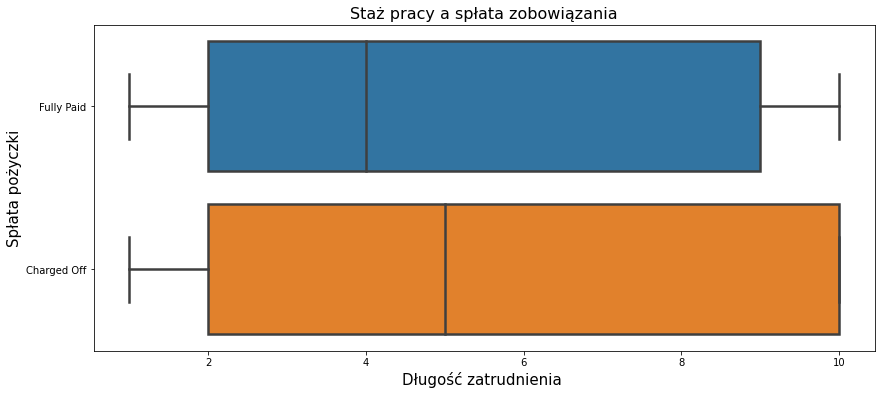

In [123]:
plt.figure(figsize = (14,6))
ax = sns.boxplot(x="emp_length" , y= "loan_status", data=data_loan, linewidth=2.5)
plt.title("Staż pracy a spłata zobowiązania", fontsize=16)
plt.xlabel("Długość zatrudnienia ", fontsize=15)
plt.ylabel("Spłata pożyczki", fontsize=15)

### Wniosek:
Na podstawie przedstawionych wykresów wnioskuję, iż jest większa liczba pożyczkobiorców niespłacających kredytu jest od 9 do 10 lat zatrudnienia. Ci spłacający mają krótszy staż pracy. Ci do 4 lat zatrudnienia częściej pozytywnie kończą umowę kredytową. 

### Pytanie f. (loan_amnt vel loan_status)

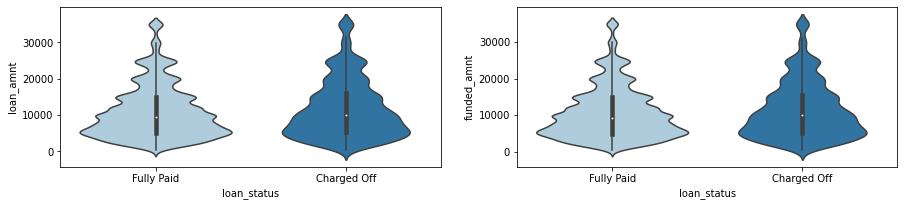

In [124]:
fig,axes = plt.subplots(3,2, figsize=(15,10))

sns.violinplot(x="loan_status", y="loan_amnt", data=data_loan, ax=axes[0][0], palette="Paired")
sns.violinplot(x="loan_status", y="funded_amnt", data=data_loan, ax=axes[0][1],palette="Paired")

fig.delaxes(ax = axes[1][0])
fig.delaxes(ax = axes[1][1])
fig.delaxes(ax = axes[2][0])
fig.delaxes(ax = axes[2][1])

Text(0, 0.5, 'Wysokość kredytu ')

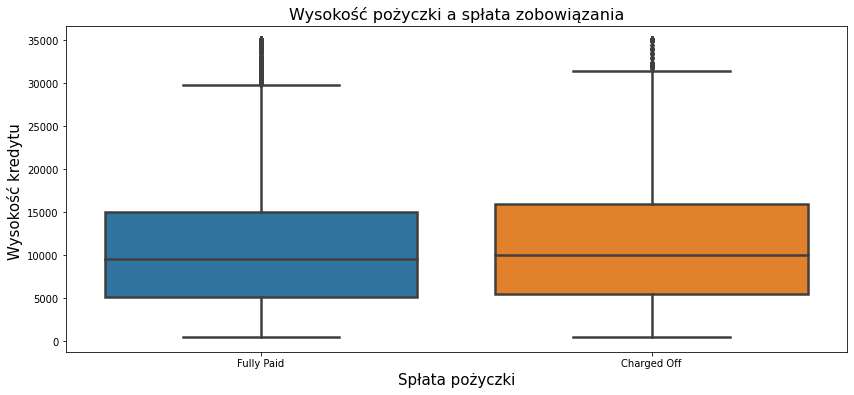

In [125]:
plt.figure(figsize = (14,6))
ax = sns.boxplot(y="loan_amnt" , x= "loan_status", data=data_loan, linewidth=2.5)
plt.title("Wysokość pożyczki a spłata zobowiązania", fontsize=16)
plt.xlabel("Spłata pożyczki", fontsize=15)
plt.ylabel("Wysokość kredytu ", fontsize=15)

### Wniosek:
Na podstawie przedstawionych wykresów widać, że podobnie rozkładają się spłaty pożyczki wnioskowanej i udzielonej. W naszym projekcie loan_amnt to kwota wnioskowana, a nie udzielona. Część pożyczek powyżej 15tys. nie została spłacona częściej.  

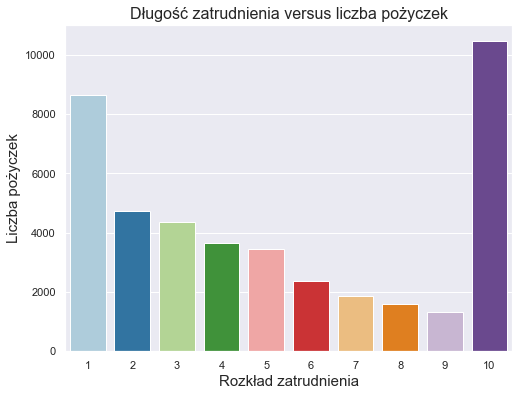

In [126]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(data_loan['emp_length'], palette='Paired')
plt.xlabel("Rozkład zatrudnienia", fontsize = 15)
plt.ylabel("Liczba pożyczek", fontsize = 15)
plt.title("Długość zatrudnienia versus liczba pożyczek", fontsize = 16)
plt.show()

### Wniosek: 
W badanym okresie 2007-20011 najwięcej pożyczek zostało udzielonych osobom z długim okresem zatrudnienia, oraz druga grupa osoby zaczynające pracę, czyli pracujące koło roku. W tej kolumnie było ponad 100 nulli, które zostaly uzupełnione wartością dominanty, co zwiększyło jeszcze liczbę udzielonych pożyczek grupie z indeksem 10. 

### Testowanie Hipotezy One Sample T-test
Ponieważ mamy jedną zmienną numeryczną zastosujemy One Sample T-test na próbce z emp_length.
Sprawdzimy czy jest róznica pomiędzy warościami średnich próbki i całej populacji tej zmiennej. 
- H0 - hipoteza zerowa "Nie ma różnic między średnią próbki a średnią całości"
- H1 - hipoteza alternatywna "Są różnice w średnich"  

In [127]:
data_loan.emp_length.mean()

5.174820735864582

In [128]:
len(data_loan.emp_length)

42535

In [129]:
# weźmy próbkę danych emp_length 30%
sample_size = 14100
emp_length_sample = np.random.choice(data_loan.emp_length, sample_size)
emp_length_sample

array([10,  8,  7, ..., 10,  4, 10])

In [130]:
ttest, p_value = ttest_1samp(emp_length_sample, data_loan.emp_length.mean())
print(p_value)

0.22544023242951172


In [131]:
if p_value < 0.05:
    print('Odrzucamy hipotezę zerową H0 - Są różnice w średnich')
else:
    print('Akceptujemy hipotezę zerową H0 - Nie ma różnic między średnią próbki a średnią całości')

Akceptujemy hipotezę zerową H0 - Nie ma różnic między średnią próbki a średnią całości


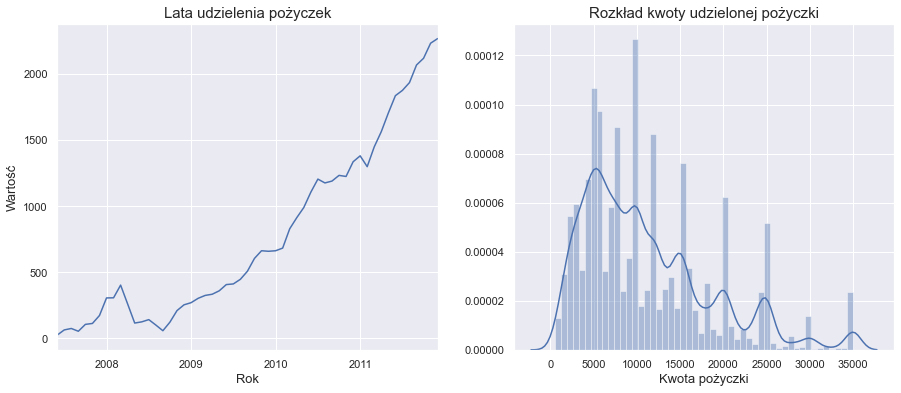

In [132]:
year_dist = data_loan.groupby(['issue_d']).size()
plt.figure(figsize=(15,6))
sns.set()

ax1 = plt.subplot(1, 2, 1)
ax1 = year_dist.plot()
ax1 = plt.title('Lata udzielenia pożyczek', fontsize = 15)
ax1 = plt.xlabel('Rok', fontsize = 13)
ax1 = plt.ylabel('Wartość', fontsize = 13)

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(data_loan['loan_amnt'])
ax2 = plt.title('Rozkład kwoty udzielonej pożyczki', fontsize = 15)
ax2 = plt.xlabel('Kwota pożyczki', fontsize = 13)

### Wniosek:
Na podstawie przedstawionych wykresów widać (na pierwszym wykresie) rosnącą popularność kredytów pożyczkowych po 2009 r. w wysokości przekraczającej 5 tys. Do 2008 r. kredyty były udzielane w niskiej wysokości do 2,5 tys.
Rozkład kwoty pożyczki jest nieco przesunięty w prawo. Większość pożyczkobiorców ubiegała się o pożyczkę w wysokości około 10 000 USD.

### funded czy loan_amnt
W naszym projekcie zajmujemy się wartością loan_amnt, która jest kwotą wnioskowaną, a nie rzeczywiście przyznaną.
Funded_amnt to kwota przyznana wynikająca z danych Lending Club. Na potrzeby tego projektu analizujemy loan_amnt. 

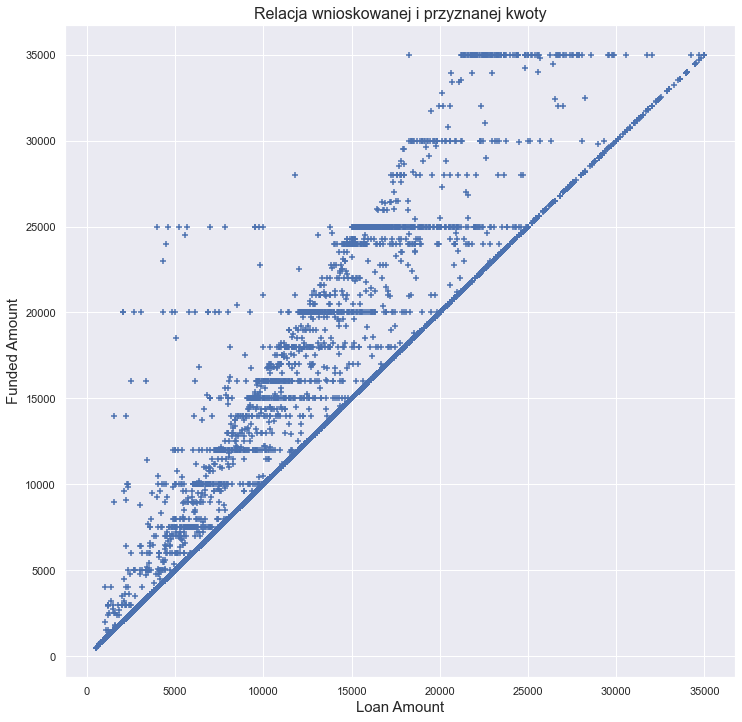

In [133]:
plt.figure(figsize=(12,12))
plt.scatter(data_loan['funded_amnt'], data_loan['loan_amnt'], marker="+")
plt.title("Relacja wnioskowanej i przyznanej kwoty", fontsize = 16)
plt.ylabel('Funded Amount', fontsize = 15)
plt.xlabel('Loan Amount', fontsize = 15)
plt.show()

### Wniosek:
Na podstawie przedstawionego wykresu widać, że w większości wartości wnioskowane są wyższe niż przyznane. Poniżej widać również, że LC nie udziela większej pożyczki niż wnioskowana. 

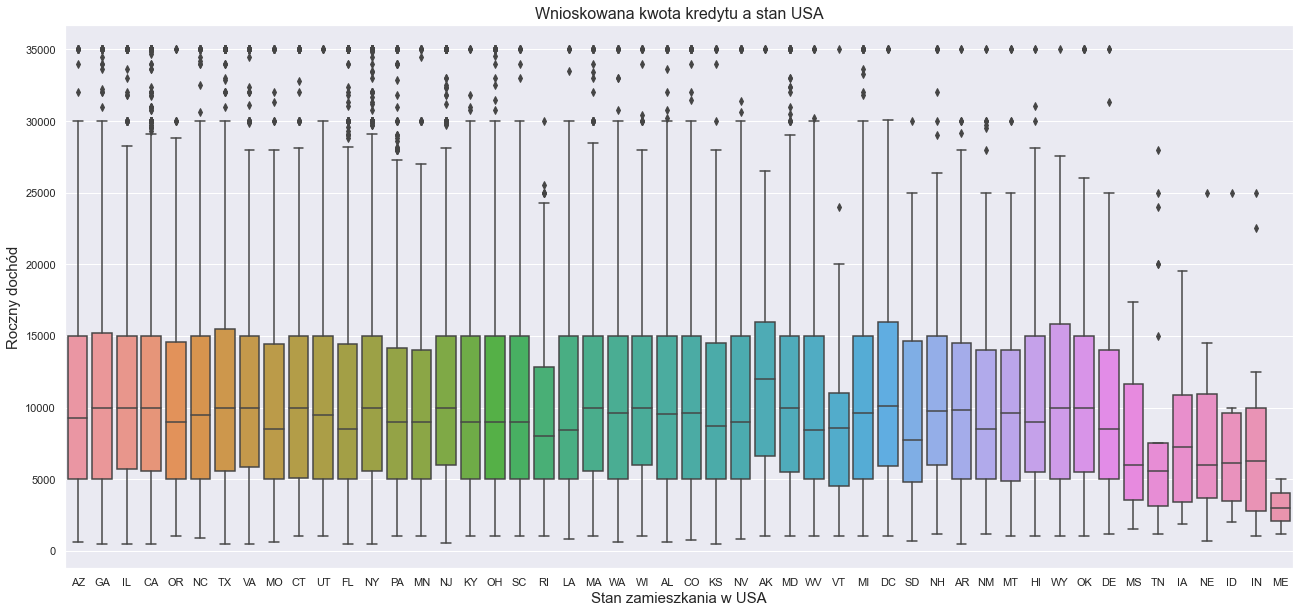

In [134]:
plt.figure(figsize=(22, 10))
ax = sns.boxplot(x="addr_state", y="loan_amnt", data=data_loan)
ax = plt.xlabel('Stan zamieszkania w USA',fontsize=15)
ax = plt.ylabel('Roczny dochód', fontsize = 15)
ax = plt.title('Wnioskowana kwota kredytu a stan USA', fontsize = 16)

### Wniosek:
Na podstawie przedstawionego zbioru wykresów boxplots, warto zauważyć, że średni roczny dochód jest najniższy w stanie Maine (ME) i niższy niż minimalny dochów w większości stanów USA. Najwyższa średia zarobków jest w stanie Alaska (AK)

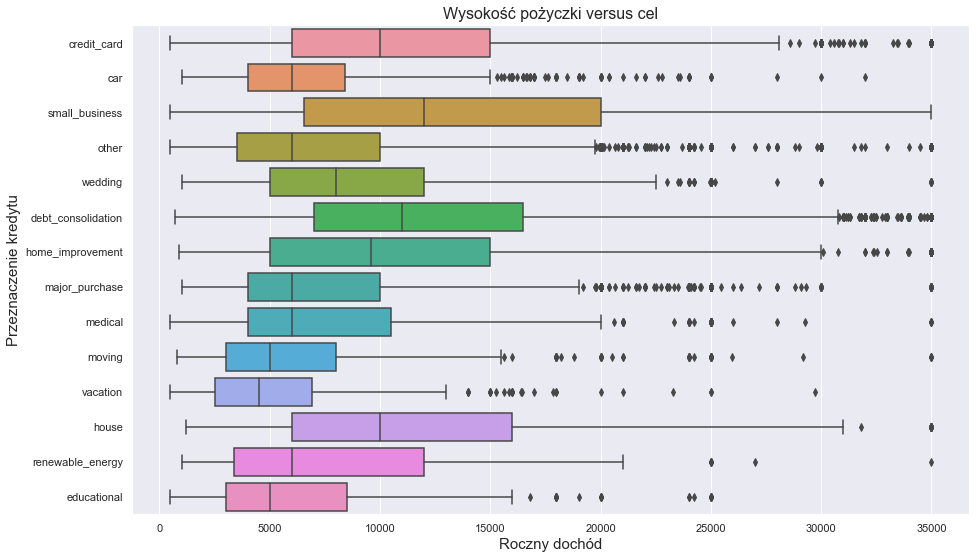

In [135]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(y="purpose", x="loan_amnt", data=data_loan)
ax = plt.xlabel('Roczny dochód',fontsize=15)
ax = plt.ylabel('Przeznaczenie kredytu',fontsize=15)
ax = plt.title('Wysokość pożyczki versus cel',fontsize=16)

### Wniosek:
Na podstawie przedstawionego wykresu wyraźnie widać, że najwięcej kredytów jest przyznawanych na rozwój małej przedsiębiorczości. Tu również średnia i największa wartość udzielonych kredytów dotyczy tej grupy. Większość niskich kredytów jest na cel edukacyjny i wakacje. 

### Pearson’s Chi-Square Test na zależność 'purpose' a 'home_ownership'

Ponieważ mamy dwie zmienne kategoryczne zastosujemy Chi-Square Test. Sprawdzimy czy jest zależność pomiędzy tymi zmiennymi.
- H0 - hipoteza zerowa "Nie ma zależności między statusem mieszkania a celem pożyczki"
- H1 - hipoteza alternatywna "Są znaczące relacje między zmiennymi"

In [136]:
data_cross1 = pd.crosstab(data_loan['home_ownership'], data_loan['purpose'])
print(data_cross1)

purpose         car  credit_card  debt_consolidation  educational  \
home_ownership                                                      
MORTGAGE        779         2446                8308          113   
NONE              0            0                   1            0   
OTHER             3           16                  52            5   
OWN             163          315                1365           34   
RENT            670         2700               10050          270   

purpose         home_improvement  house  major_purchase  medical  moving  \
home_ownership                                                             
MORTGAGE                    2540    158             979      333     117   
NONE                           0      0               0        0       0   
OTHER                          7      3               8        5       3   
OWN                          352     34             252       72      28   
RENT                         300    231            1072     

In [137]:
stat, p_value, dof, expected = chi2_contingency(data_cross1)
alpha = 0.05
print(p_value)

0.0


In [138]:
if p_value <= alpha: 
    print('Odrzucamy hipotezę HO - Są znaczące relacje między zmiennymi home_ownership i purpose') 
else: 
    print('Akceptujemy hipotezę zerową HO - Nie ma zależności między statusem mieszkania a celem pożyczki') 

Odrzucamy hipotezę HO - Są znaczące relacje między zmiennymi home_ownership i purpose


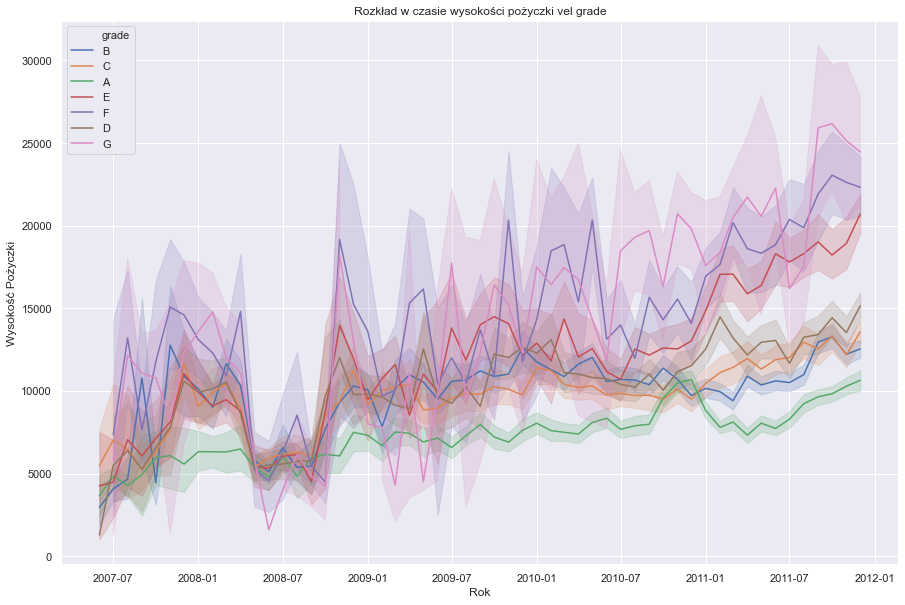

In [139]:
plt.figure(figsize=(15,10))

ax = sns.lineplot(x="issue_d", y="loan_amnt", hue="grade", data=data_loan)
ax = plt.title('Rozkład w czasie wysokości pożyczki vel grade')
ax = plt.xlabel('Rok')
ax = plt.ylabel('Wysokość Pożyczki')

### Wniosek:
Na podstawie przedstawionego wykresu widać, że wartości pożyczek z roku na rok rosły, pomijając spadek między 2008 a 2009. Dla osób z grade A wykres jest dość stabilny, wysokie skoki udzielania pożyczek są dla osób z grade F, D, G.

### Dobry czy zły pożyczkobiorca?

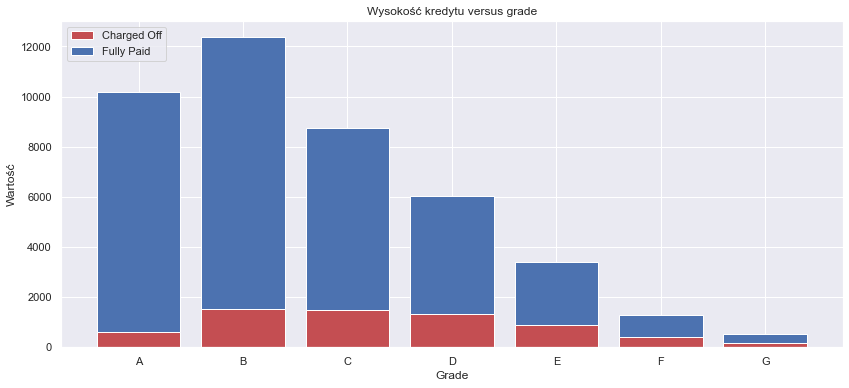

In [140]:
plt.figure(figsize=(14,6))
plot_data = data_loan.groupby(['grade','loan_status']).size().unstack().T
r = range(7)

ax = plt.bar(r, plot_data.values[0], color='r', edgecolor='white',label='Charged Off')
ax = plt.bar(r, plot_data.values[1], bottom=plot_data.values[0], color='b', 
             edgecolor='white',label='Fully Paid')
names = plot_data.columns
ax = plt.xticks(r, names)
ax = plt.legend(loc='upper left')
ax = plt.xlabel('Grade')
ax = plt.ylabel('Wartość')
ax = plt.title('Wysokość kredytu versus grade')

### Wniosek:
Na podstawie przedstawionego wykresu widać, że większość wyższych pożyczek jest udzielanych osobom z grade A, B, C. Osoby z niższym grade mają niższe zobowiązania.  

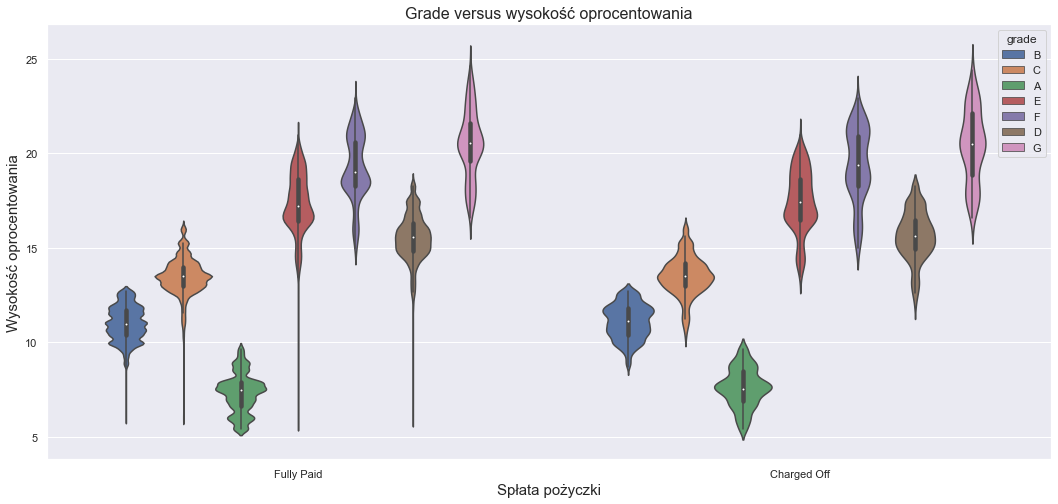

In [141]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="loan_status",y="int_rate",data=data_loan, hue="grade")
plt.title("Grade versus wysokość oprocentowania", fontsize=16)
plt.xlabel("Spłata pożyczki", fontsize=15)
plt.ylabel("Wysokość oprocentowania", fontsize=15)
plt.show()

### Wniosek:
Na podstawie przedstawionego wykresu widać, że im lepszy grade A czy B tym wysokość oprocentowania kredytu jest niższa. Osoby z grade = A mają oprocentowanie 5%-10%, a pożyczkobiorcy z garde G od 15% do ponad 25%. 

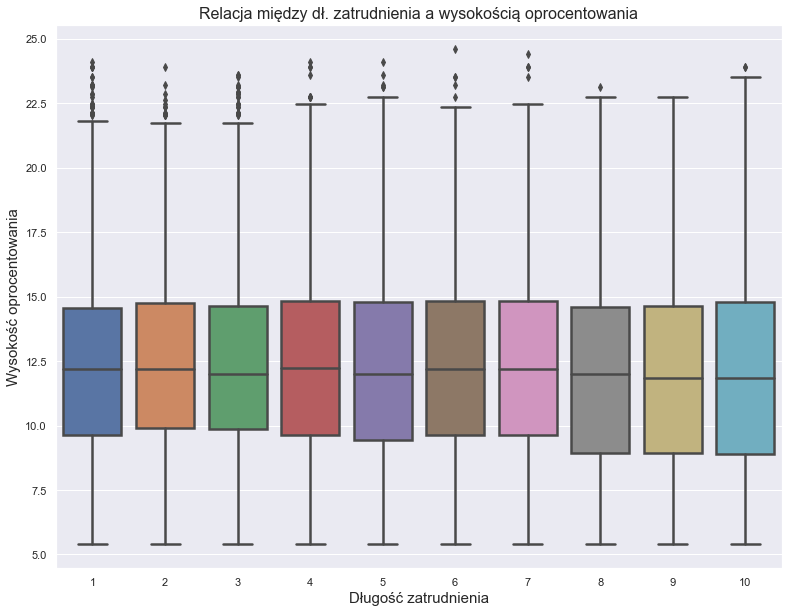

In [142]:
plt.figure(figsize = (13,10))
ax = sns.boxplot(x="emp_length", y= "int_rate", data=data_loan, linewidth=2.5)
plt.xlabel("Długość zatrudnienia",fontsize=15)
plt.ylabel("Wysokość oprocentowania",fontsize=15)
plt.title("Relacja między dł. zatrudnienia a wysokością oprocentowania", fontsize=16)
plt.show()

### Wniosek:
Można podejrzewać, że kredytobiorcy z dłuższym stażem zatrudnienia i ustabilizowaną sytuacją zawodową mają szanse na niższe oprocentowanie kredytu. Część z nich, ze stażem 8,9 czy 10 lat ma najniższe oprocentowanie mniejsze niż 10% a średnia oprocentowania jest dla nich niższa. Spróbujemy to sprawdzić na testach. Zastosuję test niezależności, Two Sample T-test

### Zastosuję test niezależności, Two Sample T-test
- H0 - Hipoteza zerowa. "Nie ma zależności między długością zatrudnienia w wysokością oprocentowania pożyczki"
- H1 - Hipoteza alternatywna. "Wysokość oprocentowania pożyczki jest związana ze stażem pracy"

In [143]:
a = data_loan['emp_length']
a.mean()

5.174820735864582

In [144]:
b = data_loan['int_rate']
b.mean()

12.165015634183614

In [145]:
from scipy.stats import ttest_ind
ttest, p_value = stats.ttest_ind(a, b, equal_var = False)
print(p_value)

0.0


In [146]:
if p_value < 0.05:
    print('Odrzucamy hipotezę zerową H0 - Wysokość oprocentowania pożyczki jest związana ze stażem pracy')
else:
    print('Akceptujemy hipotezę zerową H0 - Nie ma zależności między długością zatrudnienia w wysokością oprocentowania pożyczki')

Odrzucamy hipotezę zerową H0 - Wysokość oprocentowania pożyczki jest związana ze stażem pracy


### Two Sample T-test

- H0 - Hipoteza zerowa. "Oprocentowania pożyczki dla pracowników ze stażem 10 i 4 lata są równe"
- H1 - Hipoteza alternatywna. "Wysokość oprocentowania jest inna dla pracowników ze stażem 10 i 4 lata"

In [147]:
emp_10 = data_loan[data_loan['emp_length'] == 10]['int_rate']
emp_10.mean()

12.076703558820723

In [148]:
emp_4 = data_loan[data_loan['emp_length'] == 4]['int_rate']
emp_4.mean()

12.306152370512468

In [149]:
from scipy.stats import ttest_ind
ttest, p_value = stats.ttest_ind(emp_10, emp_4, equal_var = False)
print(p_value)

0.0015679055118476121


In [150]:
if p_value < 0.05:
    print('Odrzucamy hipotezę zerową H0 - Wysokość oprocentowania jest inna dla pracowników ze stażem 10 i 4 lata')
else:
    print('Akceptujemy hipotezę zerową H0 - Oprocentowania pożyczki dla pracowników ze stażem 10 i 4 lata są równe')

Odrzucamy hipotezę zerową H0 - Wysokość oprocentowania jest inna dla pracowników ze stażem 10 i 4 lata


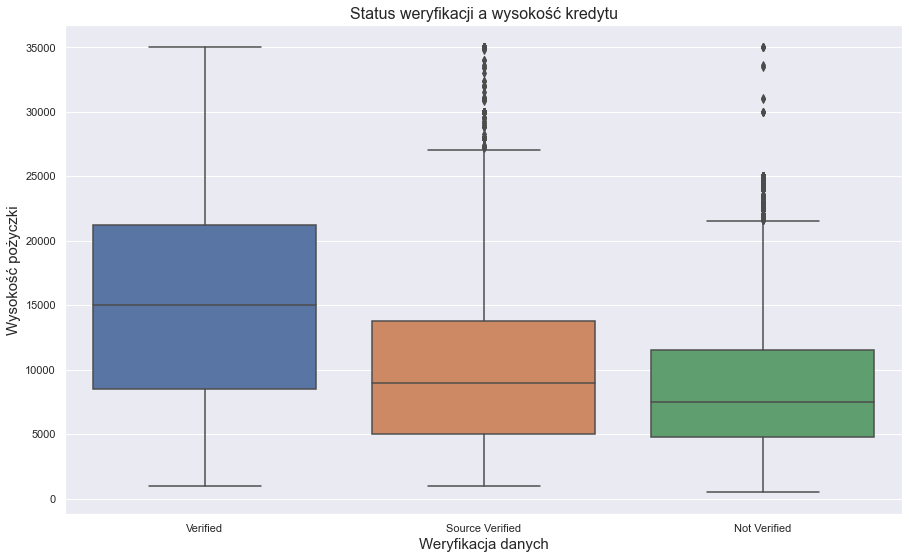

In [151]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x="verification_status", y="loan_amnt", data=data_loan)
ax = plt.xlabel('Weryfikacja danych',fontsize=15)
ax = plt.ylabel('Wysokość pożyczki',fontsize=15)
ax = plt.title('Status weryfikacji a wysokość kredytu',fontsize=16)

### Wniosek:
Więcej zweryfikowanych pożyczek jest na pożyczkach między 8500 a 21000. Niższe pożyczki są częściej nieweryfikowane. 

### Test ANOVA

- H0 hipoteza zerowa - Nie ma różnic w grupach weryfikacji
- H1 hipoteza alternatywna - Średnie w grupach weryfikacyjnych są różne

In [152]:
from scipy.stats import f_oneway
a = data_loan[data_loan['verification_status'] == 'Verified']['loan_amnt']
a.mean()

15624.330042313117

In [153]:
b = data_loan[data_loan['verification_status'] == 'Source Verified']['loan_amnt']
b.mean()

10068.780322142442

In [154]:
c = data_loan[data_loan['verification_status'] == 'Not Verified']['loan_amnt']
c.mean()

8394.133169847531

In [155]:
fvalue, p_value = stats.stats.f_oneway(a, b, c)
print(fvalue, p_value)

4716.3219777419445 0.0


In [156]:
if p_value < 0.05:
    print('Odrzucamy hipotezę zerową H0 - Średnie w grupach weryfikacyjnych są różne')
else:
    print('Akceptujemy hipotezę zerową H0 - Nie ma różnic w grupach weryfikacji')

Odrzucamy hipotezę zerową H0 - Średnie w grupach weryfikacyjnych są różne


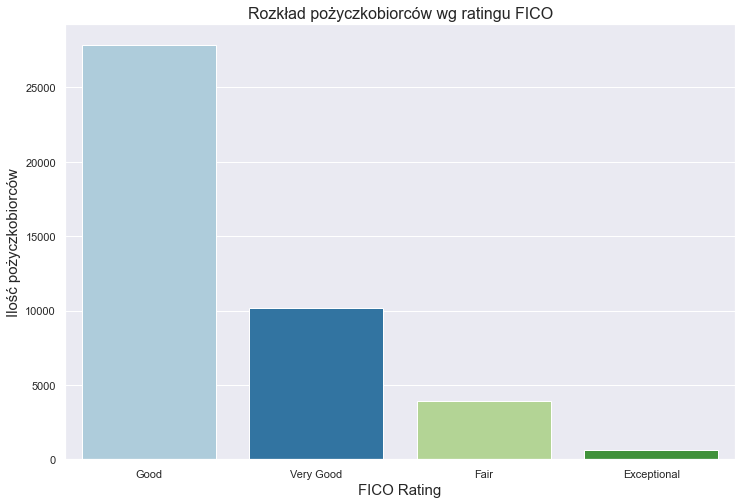

In [157]:
plt.figure(figsize = (12,8))
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(data_loan['fico_rating'], palette='Paired')
plt.xlabel("FICO Rating",fontsize=15)
plt.ylabel("Ilość pożyczkobiorców",fontsize=15)
plt.title("Rozkład pożyczkobiorców wg ratingu FICO", fontsize=16)
plt.show()

### Wniosek:
Na podstawie przedstawionego wykresu widać, iż najmniej pożyczkobiorców ma najwyższe Fico.

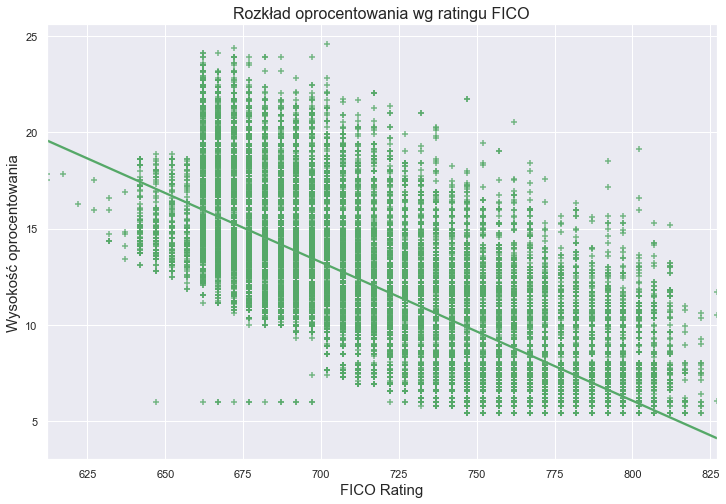

In [158]:
sns.regplot(y="int_rate", x="fico_mean", marker="+", data=data_loan, color="g")
plt.xlabel("FICO Rating",fontsize=15)
plt.ylabel("Wysokość oprocentowania",fontsize=15)
plt.title("Rozkład oprocentowania wg ratingu FICO", fontsize=16)
plt.show()

### Wniosek:
Na podstawie przedstawionego wykresu "Im wyższe Fico tym niższe oprocentowanie". 

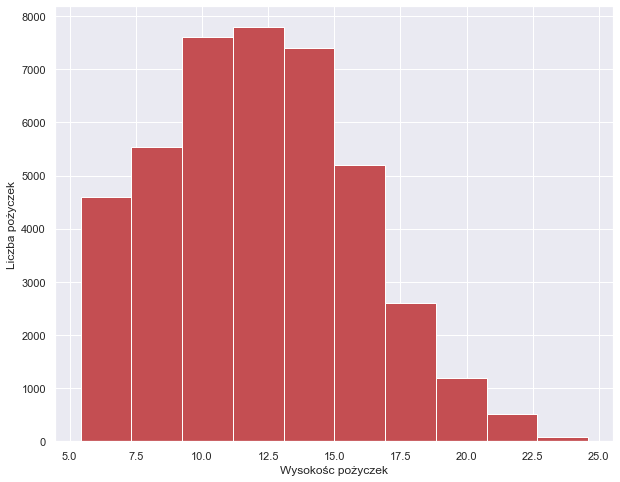

In [159]:
data_loan.int_rate.hist(figsize=(10,8), color='r')
plt.ylabel('Liczba pożyczek')
plt.xlabel('Wysokośc pożyczek')
plt.show()

### Wniosek:
Na podstawie przedstawionego barplotu widać, że Lending Ckub najchętniej udziela pożyczek do 15 tys. 

# Feature Engineering

1. Wcześniej stworzyłam 'rating' z FICO (powyżej), który pójdzie do encodowania.
2. Wcześniej było 'grade' do łatwiejszej wizualizacji, teraz jednak 'grade' usuwam i zostawiam analitykę sub_grade.
3. Stworzę przedziały dla 'annual_income' i 'loan_amnt' i pójdzie do encodowania.
3. Stworzę również przedziały dla wysokości pożyczek. 

In [160]:
data_loan.drop([('grade')],axis=1,inplace=True)

In [161]:
def loan_amnt_rate (row):
    if row['loan_amnt'] < 5000:
        return 'Minimal Loan'
    if row['loan_amnt'] < 10000:
        return 'Medium Low Loan'
    if row['loan_amnt'] < 15000:
        return 'Low Loan'
    if row['loan_amnt'] < 20000:
        return 'Medium High Loan'
    if row['loan_amnt'] < 25000:
        return 'High Loan'
    if row['loan_amnt'] < 30000:
        return 'Very High Loan'
    if row['loan_amnt']  >= 30000:
       return 'Extremely High Loan'
    return 'Other'

data_loan['loan_amnt_rating'] = data_loan.apply (lambda row: loan_amnt_rate(row), axis=1)
data_loan[['loan_amnt','loan_amnt_rating','emp_length','annual_inc']]

,loan_amnt,loan_amnt_rating,emp_length,annual_inc
0,5000.0,Medium Low Loan,10,24000.0
1,2500.0,Minimal Loan,1,30000.0
2,2400.0,Minimal Loan,10,12252.0
3,10000.0,Low Loan,10,49200.0
4,3000.0,Minimal Loan,1,80000.0
...,...,...,...,...
42531,3500.0,Minimal Loan,1,180000.0
42532,1000.0,Minimal Loan,1,12000.0
42533,2525.0,Minimal Loan,1,110000.0
42534,6500.0,Medium Low Loan,1,60000.0


Text(0, 0.5, 'Czas zatrudnienia')

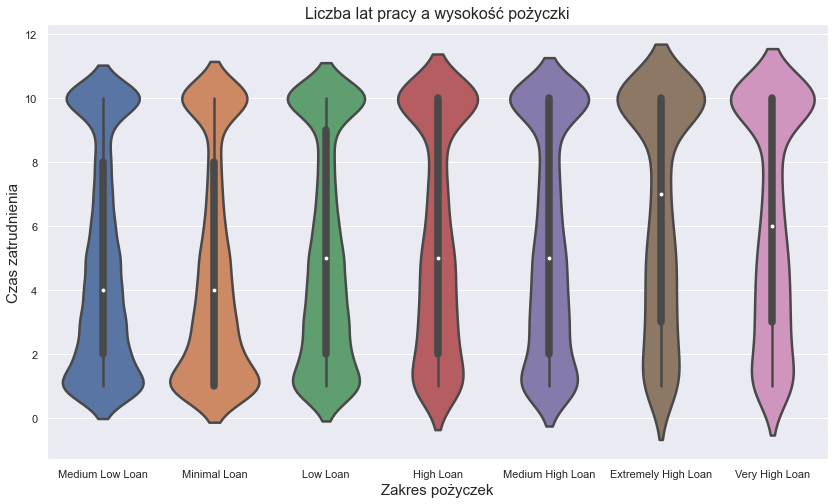

In [162]:
plt.figure(figsize = (14,8))
ax = sns.violinplot(y="emp_length", x= "loan_amnt_rating", data=data_loan, linewidth=2.5)
plt.title("Liczba lat pracy a wysokość pożyczki", fontsize=16)
plt.xlabel("Zakres pożyczek", fontsize=15)
plt.ylabel("Czas zatrudnienia", fontsize=15)

Text(0, 0.5, 'Oprocentowanie pożyczki')

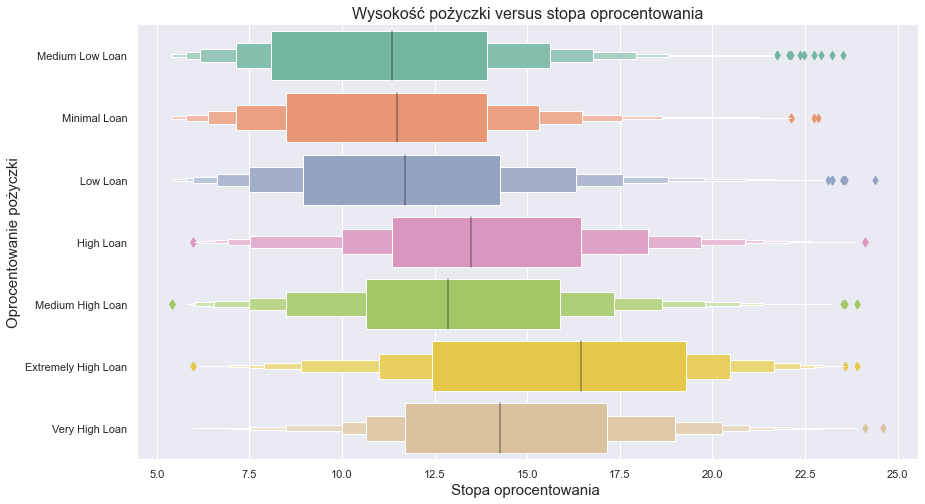

In [163]:
plt.figure(figsize = (14,8))
ax = sns.boxenplot(y="loan_amnt_rating", x="int_rate", data=data_loan, palette="Set2")
plt.title("Wysokość pożyczki versus stopa oprocentowania", fontsize=16)
plt.xlabel("Stopa oprocentowania ", fontsize=15)
plt.ylabel("Oprocentowanie pożyczki", fontsize=15)

Text(0, 0.5, 'Oprocentowanie pożyczki')

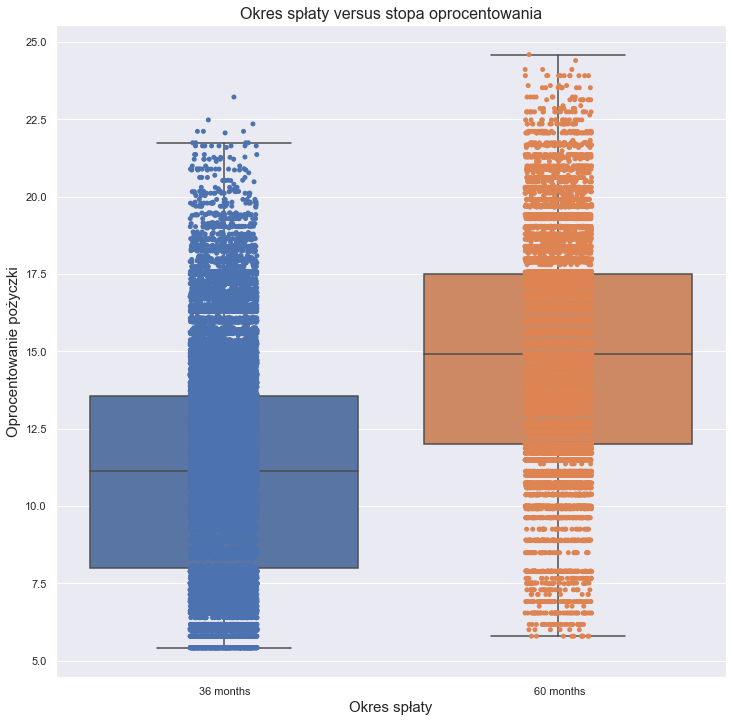

In [164]:
plt.figure(figsize = (12,12))
sns.boxplot(y='int_rate', x='term', data=data_loan, showfliers = False)
ax = sns.stripplot(y='int_rate', x='term', data=data_loan)
plt.title("Okres spłaty versus stopa oprocentowania", fontsize=16)
plt.xlabel("Okres spłaty", fontsize=15)
plt.ylabel("Oprocentowanie pożyczki", fontsize=15)

In [165]:
data_loan.int_rate.describe()

count    42535.000000
mean        12.165016
std          3.707936
min          5.420000
25%          9.630000
50%         11.990000
75%         14.720000
max         24.590000
Name: int_rate, dtype: float64

In [166]:
def int_rating (row):
    if row['int_rate'] < data_loan['int_rate'].quantile(0.25):
        return 'Minimal interest rate'
    if row['int_rate'] < data_loan['int_rate'].quantile(0.75):
        return 'Medium interest rate'
    return 'High interest rate'

data_loan['interest_rating'] = data_loan.apply (lambda row: int_rating(row), axis=1)

In [167]:
data_loan[['int_rate','interest_rating']]

,int_rate,interest_rating
0,10.65,Medium interest rate
1,15.27,High interest rate
2,15.96,High interest rate
3,13.49,Medium interest rate
4,12.69,Medium interest rate
...,...,...
42531,10.28,Medium interest rate
42532,9.64,Medium interest rate
42533,9.33,Minimal interest rate
42534,8.38,Minimal interest rate


Text(0.5, 0, 'Grupy oprocentowania')

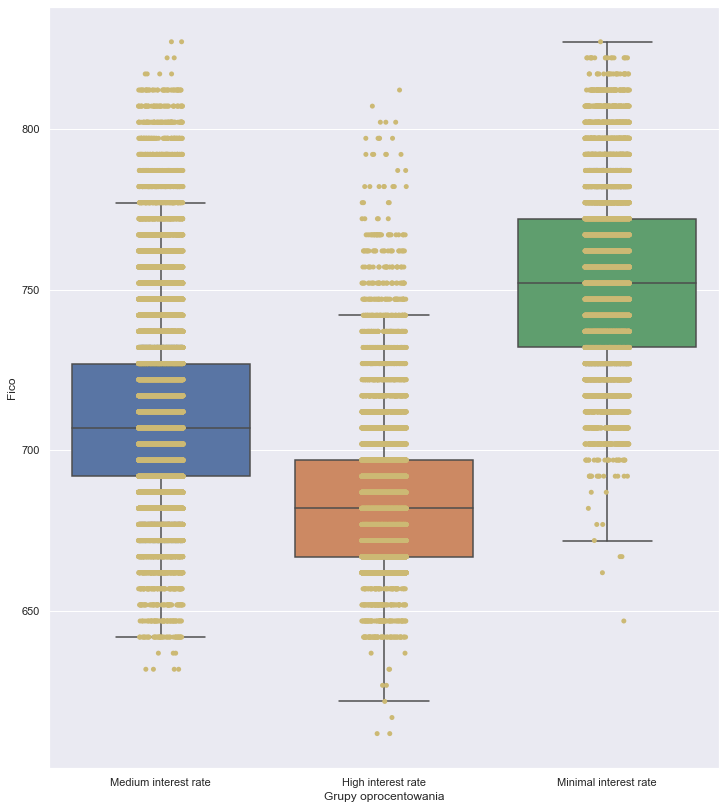

In [168]:
plt.figure(figsize=(12,14))
sns.boxplot(x = 'interest_rating', y = 'fico_mean', data=data_loan, showfliers = False)
ax = sns.stripplot(x = 'interest_rating', y = 'fico_mean', data=data_loan, color='y')
plt.ylabel('Fico')
plt.xlabel('Grupy oprocentowania')

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

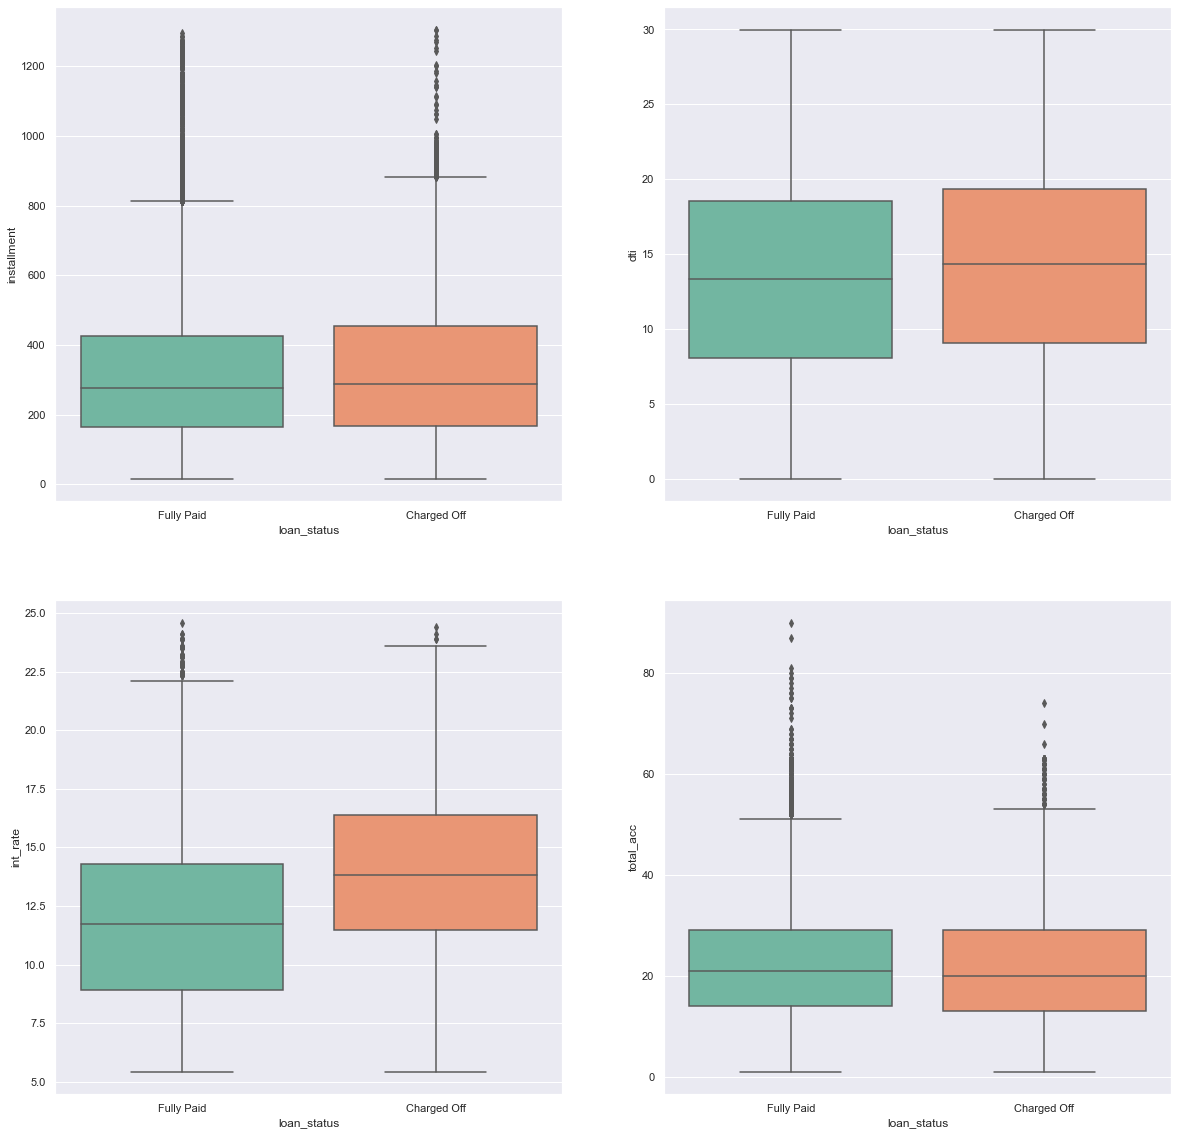

In [169]:
fig,axes = plt.subplots(2,2, figsize=(20,20))
sns.boxplot(y='installment', x='loan_status', data=data_loan, ax=axes[0][0], palette="Set2")
sns.boxplot(y='int_rate', x='loan_status', data=data_loan, ax=axes[1][0], palette="Set2")
sns.boxplot(y='dti', x='loan_status', data=data_loan, ax=axes[0][1], palette="Set2")
sns.boxplot(y='total_acc', x='loan_status', data=data_loan, ax=axes[1][1], palette="Set2")

### Target - loan_status - encoding

In [170]:
le = LabelEncoder()
data_loan['loan_status'] = le.fit_transform(data_loan['loan_status'].astype(str)) 
data_loan['loan_status'].value_counts()

1    36104
0     6431
Name: loan_status, dtype: int64

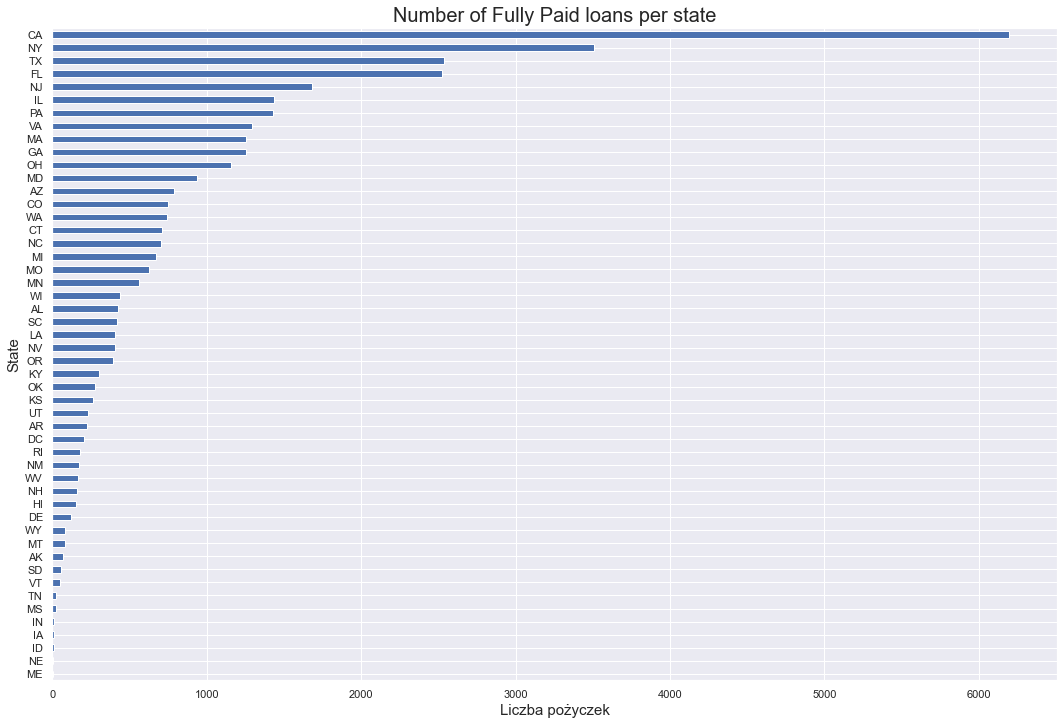

In [171]:
fig = plt.figure(figsize=(18,12))
data_loan[data_loan['loan_status']== 1].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Liczba pożyczek',fontsize=15)
plt.title('Number of Fully Paid loans per state',fontsize=20);

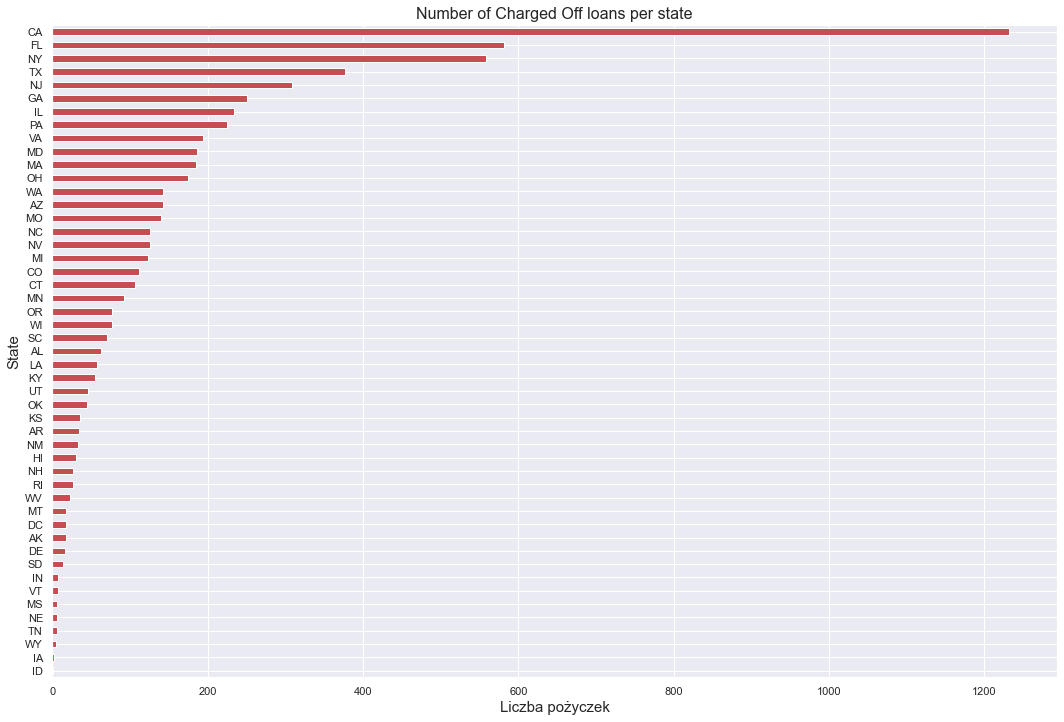

In [172]:
fig = plt.figure(figsize=(18,12))
data_loan[data_loan['loan_status']== 0].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh',color = 'r')
plt.ylabel('State',fontsize=15)
plt.xlabel('Liczba pożyczek',fontsize=15)
plt.title('Number of Charged Off loans per state',fontsize=16);

Text(0.5, 1.0, 'Distribution of Interest Rate')

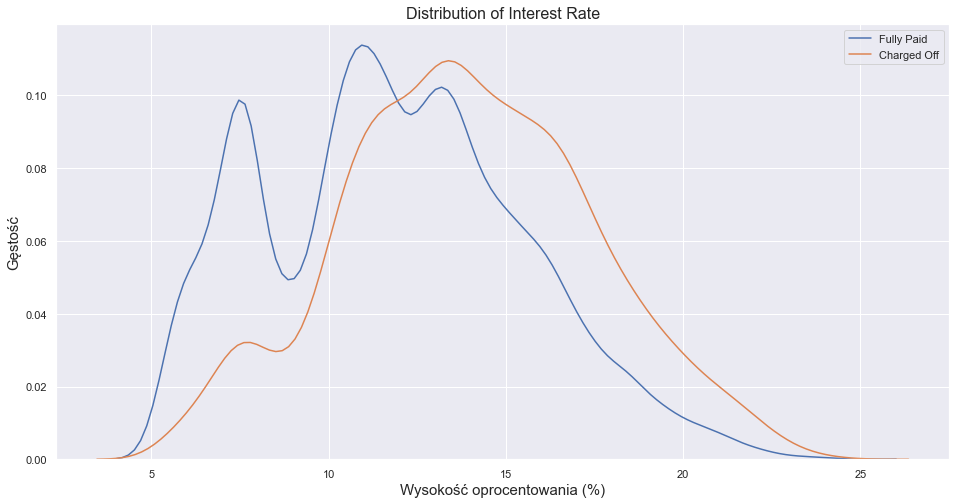

In [173]:
fig = plt.figure(figsize=(16,8))
sns.kdeplot(data_loan.loc[data_loan['loan_status'] == 1, 'int_rate'], label = 'Fully Paid')
sns.kdeplot(data_loan.loc[data_loan['loan_status'] == 0, 'int_rate'], label = 'Charged Off')
plt.xlabel('Wysokość oprocentowania (%)',fontsize=15)
plt.ylabel('Gęstość',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=16)

In [174]:
data_loan.dtypes

loan_amnt                        float64
funded_amnt                      float64
term                              object
int_rate                         float64
installment                      float64
sub_grade                         object
emp_length                         int64
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                        int64
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                      float64
earliest_cr_line                   int64
inq_last_6mths                   float64
mths_since_last_delinq           float64
open_acc                         float64
pub_rec                          float64
revol_bal                        float64
revol_util                       float64
total_acc                        float64
pub_rec_bankrupt

Mamy jeszcze dużą liczbę zmiennych obiektowych, kategrycznych, które będę sukcesywnie enkodowała przed modelowaniem. 

Text(0, 0.5, 'Typy zmiennych')

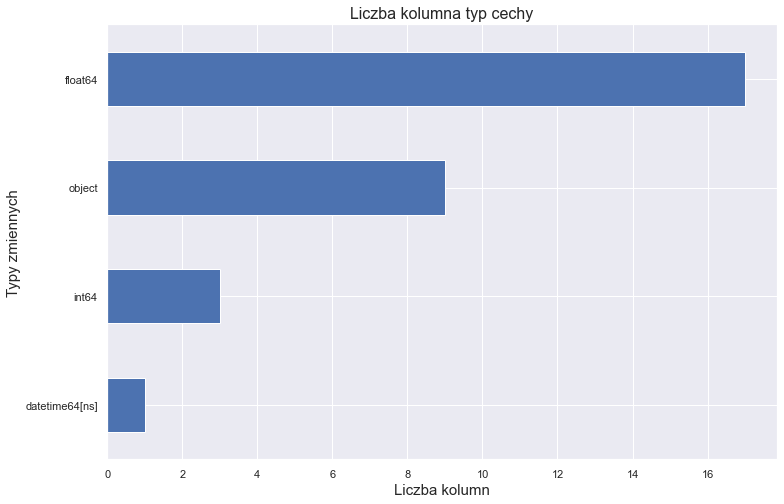

In [175]:
data_loan.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Liczba kolumna typ cechy',fontsize=16)
plt.xlabel('Liczba kolumn',fontsize=15)
plt.ylabel('Typy zmiennych',fontsize=15)

In [176]:
data_loan.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                    2
sub_grade              35
home_ownership          5
verification_status     3
purpose                14
addr_state             50
fico_rating             4
loan_amnt_rating        7
interest_rating         3
dtype: int64

In [177]:
data_loan.shape

(42535, 30)

### Daty 

In [178]:
data_loan['issue_d']= pd.to_datetime(data_loan['issue_d']).apply(lambda x: int(x.strftime('%Y')))

In [179]:
print(data_loan.earliest_cr_line)

0        1985
1        1999
2        2001
3        1996
4        1996
         ... 
42531    2007
42532    2007
42533    2007
42534    2007
42535    2007
Name: earliest_cr_line, Length: 42535, dtype: int64


In [180]:
print(data_loan.issue_d)

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
42531    2007
42532    2007
42533    2007
42534    2007
42535    2007
Name: issue_d, Length: 42535, dtype: int64


### Po encodowaniu targetu do pytań z EDA

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

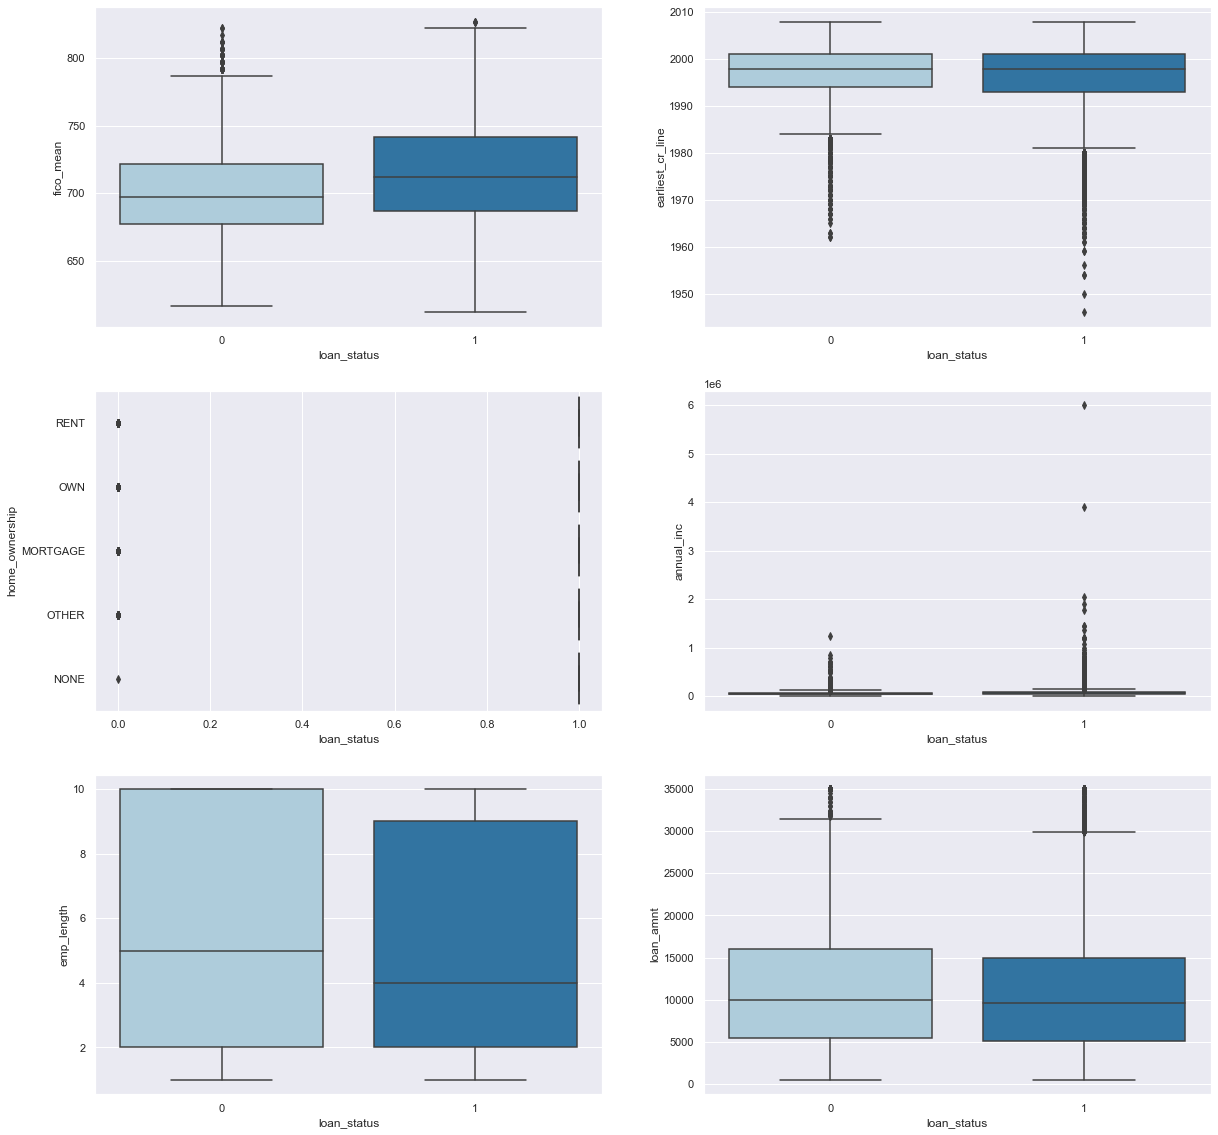

In [181]:
fig,axes = plt.subplots(3,2, figsize=(20,20))

sns.boxplot(y='fico_mean', x='loan_status', data=data_loan, ax=axes[0][0], palette="Paired")
sns.boxplot(y='earliest_cr_line', x='loan_status', data=data_loan, ax=axes[0][1], palette="Paired")
sns.boxplot(y='home_ownership', x='loan_status', data=data_loan, ax=axes[1][0], palette="Paired")
sns.boxplot(y='annual_inc', x='loan_status', data=data_loan, ax=axes[1][1], palette="Paired")
sns.boxplot(y='emp_length', x='loan_status', data=data_loan, ax=axes[2][0], palette="Paired")
sns.boxplot(y='loan_amnt', x='loan_status', data=data_loan, ax=axes[2][1], palette="Paired")

### Outliery wartości odstające

In [182]:
data_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,42535.0,11089.722581,7410.938391,500.00,5200.00,9700.00,15000.00,35000.00
funded_amnt,42535.0,10821.585753,7146.914675,500.00,5000.00,9600.00,15000.00,35000.00
int_rate,42535.0,12.165016,3.707936,5.42,9.63,11.99,14.72,24.59
installment,42535.0,322.623063,208.927216,15.67,165.52,277.69,428.18,1305.19
emp_length,42535.0,5.174821,3.458260,1.00,2.00,4.00,9.00,10.00
annual_inc,42535.0,69135.697217,64093.396996,1896.00,40000.00,59000.00,82500.00,6000000.00
issue_d,42535.0,2010.231456,0.966383,2007.00,2010.00,2011.00,2011.00,2011.00
loan_status,42535.0,0.848807,0.358241,0.00,1.00,1.00,1.00,1.00
dti,42535.0,13.373043,6.726315,0.00,8.20,13.47,18.68,29.99
delinq_2yrs,42535.0,0.152345,0.512247,0.00,0.00,0.00,0.00,13.00


### kopia data_loan i na niej szukam outlierów

In [183]:
data_outliers = data_loan.select_dtypes(exclude=['object']).copy()
                      
data_outliers

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,delinq_2yrs,...,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_mean,last_fico_mean
0,5000.0,5000.0,10.65,162.87,10,24000.0,2011,1,27.65,0.0,...,1.0,33.0,3.0,0.0,13648.0,83.7,9.0,0.0,737.0,737.0
1,2500.0,2500.0,15.27,59.83,1,30000.0,2011,0,1.00,0.0,...,5.0,33.0,3.0,0.0,1687.0,9.4,4.0,0.0,742.0,249.5
2,2400.0,2400.0,15.96,84.33,10,12252.0,2011,1,8.72,0.0,...,2.0,33.0,2.0,0.0,2956.0,98.5,10.0,0.0,737.0,737.0
3,10000.0,10000.0,13.49,339.31,10,49200.0,2011,1,20.00,0.0,...,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0.0,692.0,602.0
4,3000.0,3000.0,12.69,67.79,1,80000.0,2011,1,17.94,0.0,...,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0.0,697.0,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,3500.0,3500.0,10.28,113.39,1,180000.0,2007,1,10.00,0.0,...,0.0,33.0,7.0,0.0,0.0,49.7,20.0,0.0,687.0,817.0
42532,1000.0,1000.0,9.64,32.11,1,12000.0,2007,1,10.00,0.0,...,0.0,33.0,7.0,0.0,0.0,49.7,20.0,0.0,697.0,782.0
42533,2525.0,2525.0,9.33,80.69,1,110000.0,2007,1,10.00,0.0,...,0.0,33.0,7.0,0.0,0.0,49.7,20.0,0.0,712.0,712.0
42534,6500.0,6500.0,8.38,204.84,1,60000.0,2007,1,4.00,0.0,...,0.0,33.0,7.0,0.0,0.0,49.7,20.0,0.0,742.0,722.0


In [184]:
Q1 = data_outliers.quantile(0.25)
Q3 = data_outliers.quantile(0.75)
IQR = Q3 - Q1

data_outliers_amnt = pd.DataFrame({'Q1':Q1, 'Q3':Q3,'IQR':IQR, 'lower': Q1-1.5*IQR, 'upper': Q3+1.5*IQR,
                 'number of Outliers' : ((data_outliers < (Q1 - 1.5 * IQR)) | (data_outliers > (Q3 + 1.5 * IQR))).sum(),
                })

data_outliers_amnt

,Q1,Q3,IQR,lower,upper,number of Outliers
loan_amnt,5200.00,15000.00,9800.00,-9500.000,29700.000,1218
funded_amnt,5000.00,15000.00,10000.00,-10000.000,30000.000,691
int_rate,9.63,14.72,5.09,1.995,22.355,94
installment,165.52,428.18,262.66,-228.470,822.170,1393
emp_length,2.00,9.00,7.00,-8.500,19.500,0
annual_inc,40000.00,82500.00,42500.00,-23750.000,146250.000,2032
issue_d,2010.00,2011.00,1.00,2008.500,2012.500,2996
loan_status,1.00,1.00,0.00,1.000,1.000,6431
dti,8.20,18.68,10.48,-7.520,34.400,0
delinq_2yrs,0.00,0.00,0.00,0.000,0.000,4735


### data_outliers
Zamieniam outliery na wybranych kolumnach na mediany to będzie drugi zbór do modelowania

In [185]:
data_outliers = data_outliers.drop(['loan_status', 'delinq_2yrs', 'pub_rec', 'pub_rec_bankruptcies', 'mths_since_last_delinq'], axis=1) 

In [186]:
for col_name in data_outliers.columns[:-1]:
    q1 = data_outliers[col_name].quantile(0.25)
    q3 = data_outliers[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    data_outliers.loc[(data_outliers[col_name] < low) | (data_outliers[col_name] > high), col_name] = data_outliers[col_name].median()

data_outliers.describe()

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,issue_d,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_mean,last_fico_mean
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000
mean,10419.303515,10417.018926,12.140418,301.462641,5.174821,61079.341457,2010.456941,13.373043,1997.277654,0.958082,9.111014,10093.452216,49.118389,21.562713,715.044434,683.437275
std,6363.021099,6465.777909,3.671836,176.191735,3.458260,27639.749197,0.704607,6.726315,5.669066,1.161342,4.055111,8311.461260,28.334260,10.674648,36.176232,96.609100
min,500.000000,500.000000,5.420000,15.670000,1.000000,1896.000000,2009.000000,0.000000,1981.000000,0.000000,1.000000,0.000000,0.000000,1.000000,612.000000,0.000000
25%,5200.000000,5000.000000,9.630000,165.520000,2.000000,40000.000000,2010.000000,8.200000,1994.000000,0.000000,6.000000,3635.000000,25.800000,13.000000,687.000000,642.000000
50%,9700.000000,9600.000000,11.990000,277.690000,4.000000,59000.000000,2011.000000,13.470000,1998.000000,1.000000,9.000000,8821.000000,49.700000,20.000000,712.000000,697.000000
75%,14500.000000,14500.000000,14.650000,399.090000,9.000000,76000.000000,2011.000000,18.680000,2001.000000,2.000000,12.000000,14272.500000,72.600000,28.000000,742.000000,747.000000
max,29700.000000,30000.000000,22.350000,821.590000,10.000000,146000.000000,2011.000000,29.990000,2008.000000,5.000000,21.000000,37642.000000,119.000000,53.000000,822.000000,847.500000


### Korelacja na całym zbiorze data_loan

In [187]:
corr = data_loan.corr()
corr

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,delinq_2yrs,...,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_mean,last_fico_mean
loan_amnt,1.000000,0.981746,0.292346,0.930869,0.138589,0.276125,0.142493,-0.042582,0.065112,-0.032558,...,-0.029830,0.008160,0.176791,-0.051460,0.254293,0.065231,0.256958,-0.035277,0.133232,0.080111
funded_amnt,0.981746,1.000000,0.295154,0.956522,0.138117,0.272070,0.152112,-0.039602,0.064821,-0.033209,...,-0.029560,0.008930,0.174973,-0.052447,0.250313,0.068865,0.251163,-0.036591,0.125637,0.080217
int_rate,0.292346,0.295154,1.000000,0.271433,-0.012695,0.054377,0.006153,-0.200598,0.119607,0.154807,...,0.179730,-0.011536,0.024894,0.100456,0.081883,0.456247,-0.031538,0.084944,-0.702587,-0.282394
installment,0.930869,0.956522,0.271433,1.000000,0.108253,0.278342,0.072136,-0.021094,0.054948,-0.019894,...,-0.010414,-0.000512,0.175611,-0.045678,0.264837,0.094486,0.233939,-0.032499,0.064362,0.075866
emp_length,0.138589,0.138117,-0.012695,0.108253,1.000000,0.098776,0.148266,-0.019826,0.052880,0.009956,...,-0.021982,0.043536,0.088396,0.066808,0.116641,0.004615,0.199055,0.070377,0.100318,0.022608
annual_inc,0.276125,0.272070,0.054377,0.278342,0.098776,1.000000,0.012640,0.037988,-0.116519,0.022152,...,0.027747,0.001196,0.168060,-0.016344,0.283595,0.021377,0.246085,-0.014653,0.051989,0.065137
issue_d,0.142493,0.152112,0.006153,0.072136,0.148266,0.012640,1.000000,0.025840,0.074841,-0.024974,...,-0.222184,0.134174,0.005161,-0.019825,-0.052553,0.041302,0.058241,0.006514,0.100920,0.037954
loan_status,-0.042582,-0.039602,-0.200598,-0.021094,-0.019826,0.037988,0.025840,1.000000,-0.042198,-0.019508,...,-0.110917,0.006216,0.005923,-0.053770,-0.017186,-0.095320,0.021093,-0.050607,0.141917,0.440511
dti,0.065112,0.064821,0.119607,0.054948,0.052880,-0.116519,0.074841,-0.042198,1.000000,-0.036392,...,0.014637,0.036304,0.298104,-0.002718,0.190727,0.278660,0.241313,0.010149,-0.191153,-0.036380
delinq_2yrs,-0.032558,-0.033209,0.154807,-0.019894,0.009956,0.022152,-0.024974,-0.019508,-0.036392,1.000000,...,0.021012,-0.454644,0.014351,0.010352,-0.042928,-0.045811,0.068563,0.003201,-0.218525,-0.064530


Text(0.5, 1.0, 'Korelacja między numerycznymi cechami')

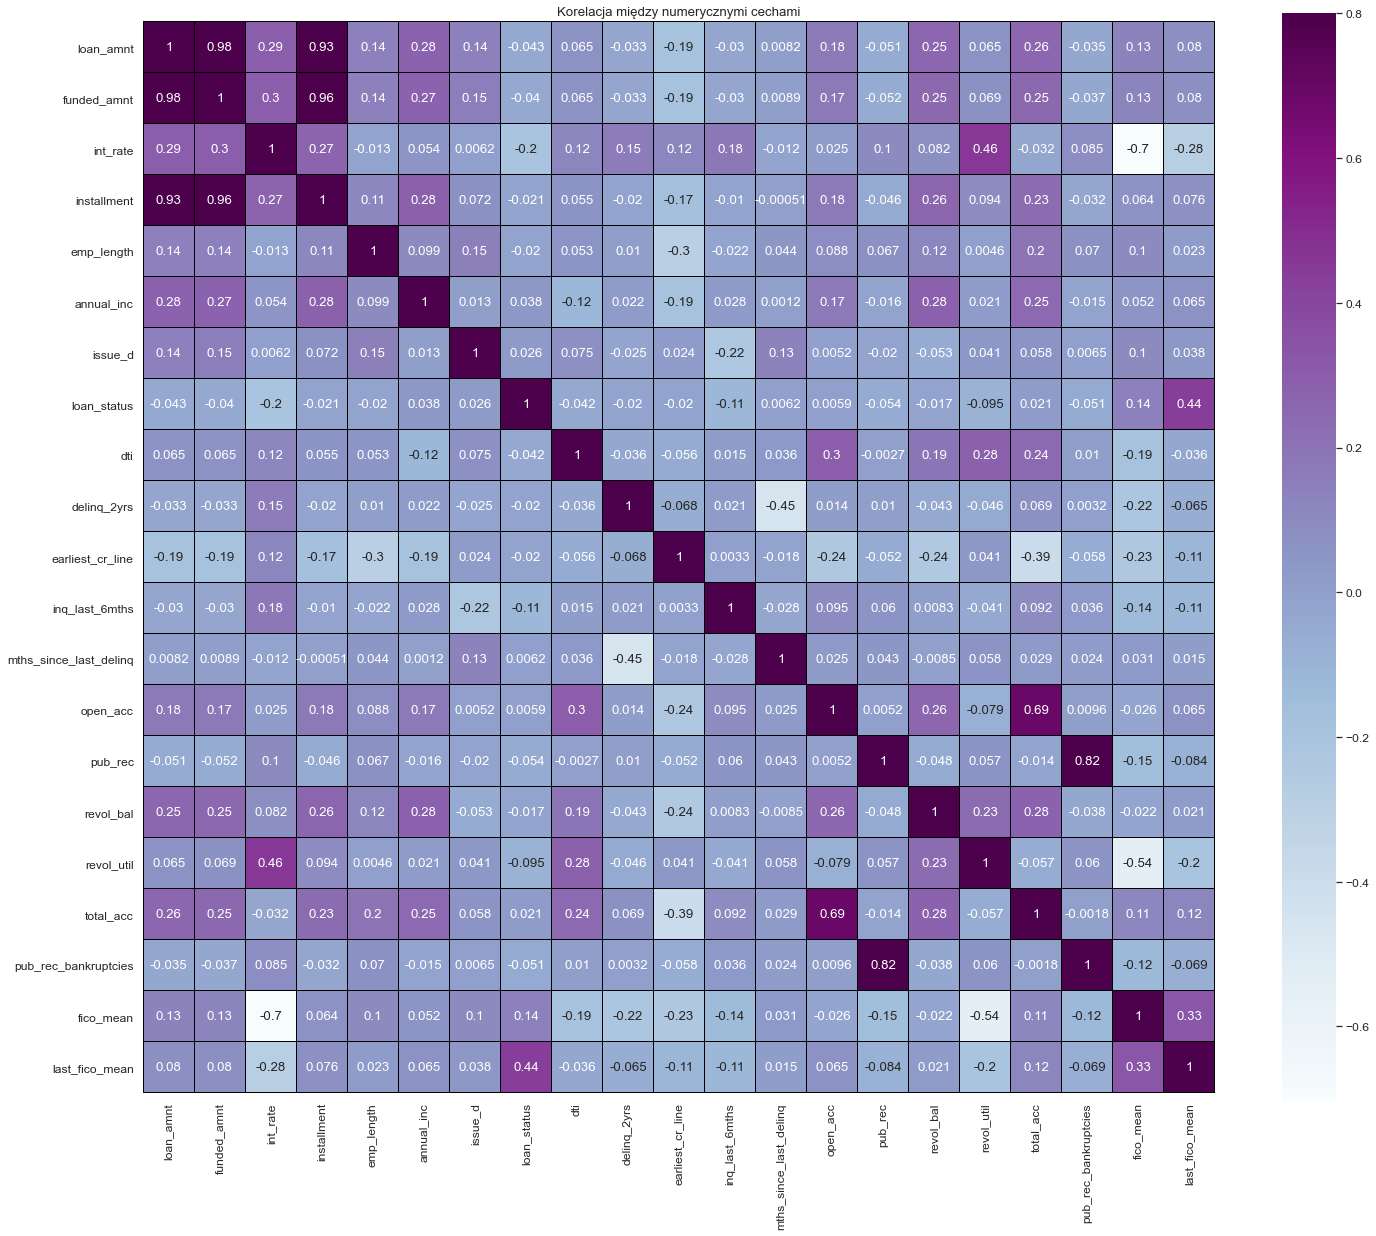

In [188]:
sns.set(font_scale=1.1)
plt.figure(figsize=(24, 20))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap="BuPu", linecolor="black")
plt.title('Korelacja między numerycznymi cechami')

In [189]:
# sns.pairplot(data_loan, kind="reg", palette="husl")

### Korelacja wybranych cech - data_loan1

In [190]:
data_loan1=data_loan[['annual_inc','installment','int_rate','fico_mean',
                      'last_fico_mean','loan_amnt','revol_bal','open_acc','total_acc','loan_status']].copy()
cor1 = data_loan1.corr()
cor1

,annual_inc,installment,int_rate,fico_mean,last_fico_mean,loan_amnt,revol_bal,open_acc,total_acc,loan_status
annual_inc,1.000000,0.278342,0.054377,0.051989,0.065137,0.276125,0.283595,0.168060,0.246085,0.037988
installment,0.278342,1.000000,0.271433,0.064362,0.075866,0.930869,0.264837,0.175611,0.233939,-0.021094
int_rate,0.054377,0.271433,1.000000,-0.702587,-0.282394,0.292346,0.081883,0.024894,-0.031538,-0.200598
fico_mean,0.051989,0.064362,-0.702587,1.000000,0.328915,0.133232,-0.022011,-0.025763,0.110587,0.141917
last_fico_mean,0.065137,0.075866,-0.282394,0.328915,1.000000,0.080111,0.021390,0.065255,0.115398,0.440511
loan_amnt,0.276125,0.930869,0.292346,0.133232,0.080111,1.000000,0.254293,0.176791,0.256958,-0.042582
revol_bal,0.283595,0.264837,0.081883,-0.022011,0.021390,0.254293,1.000000,0.257941,0.275417,-0.017186
open_acc,0.168060,0.175611,0.024894,-0.025763,0.065255,0.176791,0.257941,1.000000,0.693154,0.005923
total_acc,0.246085,0.233939,-0.031538,0.110587,0.115398,0.256958,0.275417,0.693154,1.000000,0.021093
loan_status,0.037988,-0.021094,-0.200598,0.141917,0.440511,-0.042582,-0.017186,0.005923,0.021093,1.000000


Text(0.5, 1.0, 'Korelacja między wybranymi cechami')

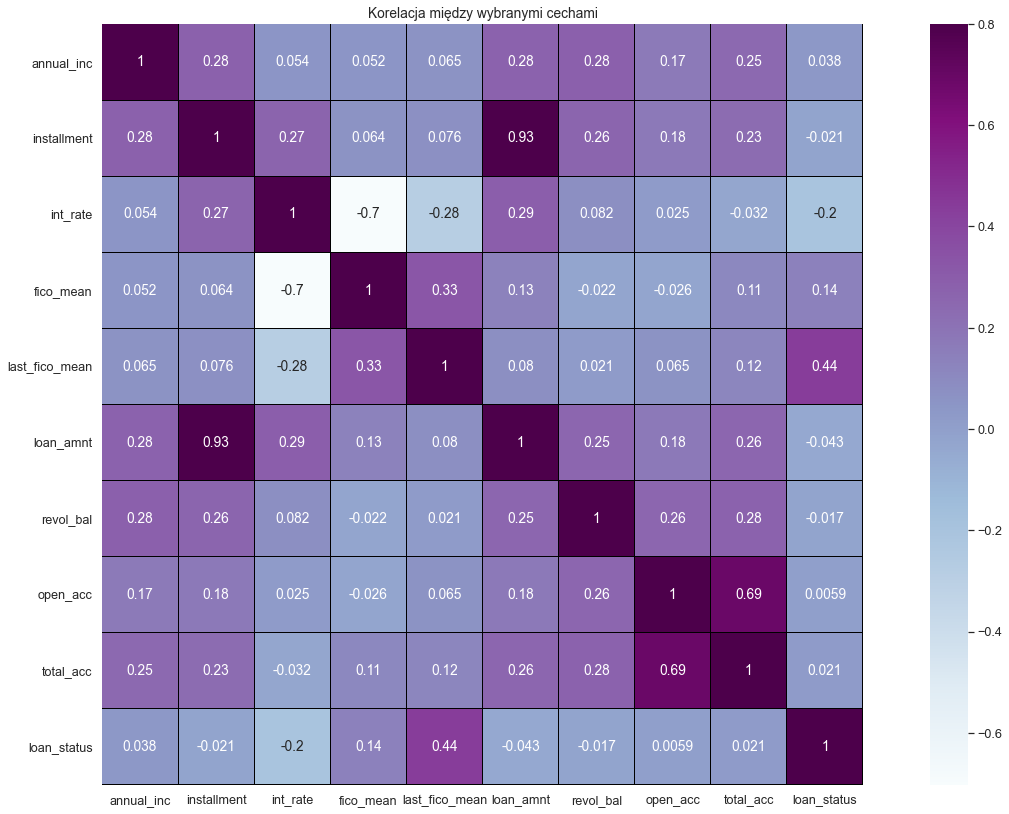

In [191]:
sns.set(font_scale=1.15)
plt.figure(figsize=(24, 14))

sns.heatmap(cor1, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap="BuPu", linecolor="black")
plt.title('Korelacja między wybranymi cechami')

### Korelacja X_2 na data_outliers uzupełnione medianą

In [192]:
cor2 = data_outliers.corr()
cor2

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,issue_d,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_mean,last_fico_mean
loan_amnt,1.000000,0.931504,0.233275,0.833385,0.120300,0.346677,0.025309,0.072677,-0.192102,-0.016351,0.181054,0.331274,0.067966,0.237972,0.119228,0.083265
funded_amnt,0.931504,1.000000,0.261402,0.867878,0.127861,0.358465,0.054919,0.068695,-0.189354,-0.018798,0.180008,0.332837,0.070863,0.240615,0.115983,0.082703
int_rate,0.233275,0.261402,1.000000,0.216128,-0.012694,0.050727,-0.010814,0.119067,0.108040,0.159467,-0.025289,0.124785,0.453285,-0.050539,-0.701221,-0.282352
installment,0.833385,0.867878,0.216128,1.000000,0.100267,0.335973,0.011295,0.058989,-0.159064,-0.016310,0.166848,0.319037,0.082023,0.210132,0.077789,0.084409
emp_length,0.120300,0.127861,-0.012694,0.100267,1.000000,0.157171,0.096545,0.052880,-0.296823,-0.010632,0.094135,0.131292,0.004615,0.198047,0.100255,0.022608
annual_inc,0.346677,0.358465,0.050727,0.335973,0.157171,1.000000,0.017886,-0.060565,-0.296050,0.015040,0.260163,0.296958,0.049498,0.368997,0.079801,0.113134
issue_d,0.025309,0.054919,-0.010814,0.011295,0.096545,0.017886,1.000000,0.064778,0.029885,-0.092006,0.013579,0.022639,0.049733,0.025444,-0.018688,-0.022241
dti,0.072677,0.068695,0.119067,0.058989,0.052880,-0.060565,0.064778,1.000000,-0.065434,0.014595,0.300831,0.292305,0.278660,0.241489,-0.191053,-0.036380
earliest_cr_line,-0.192102,-0.189354,0.108040,-0.159064,-0.296823,-0.296050,0.029885,-0.065434,1.000000,0.000343,-0.225153,-0.238818,0.021145,-0.408107,-0.219894,-0.100403
inq_last_6mths,-0.016351,-0.018798,0.159467,-0.016310,-0.010632,0.015040,-0.092006,0.014595,0.000343,1.000000,0.081199,-0.024313,-0.040245,0.091070,-0.113209,-0.091100


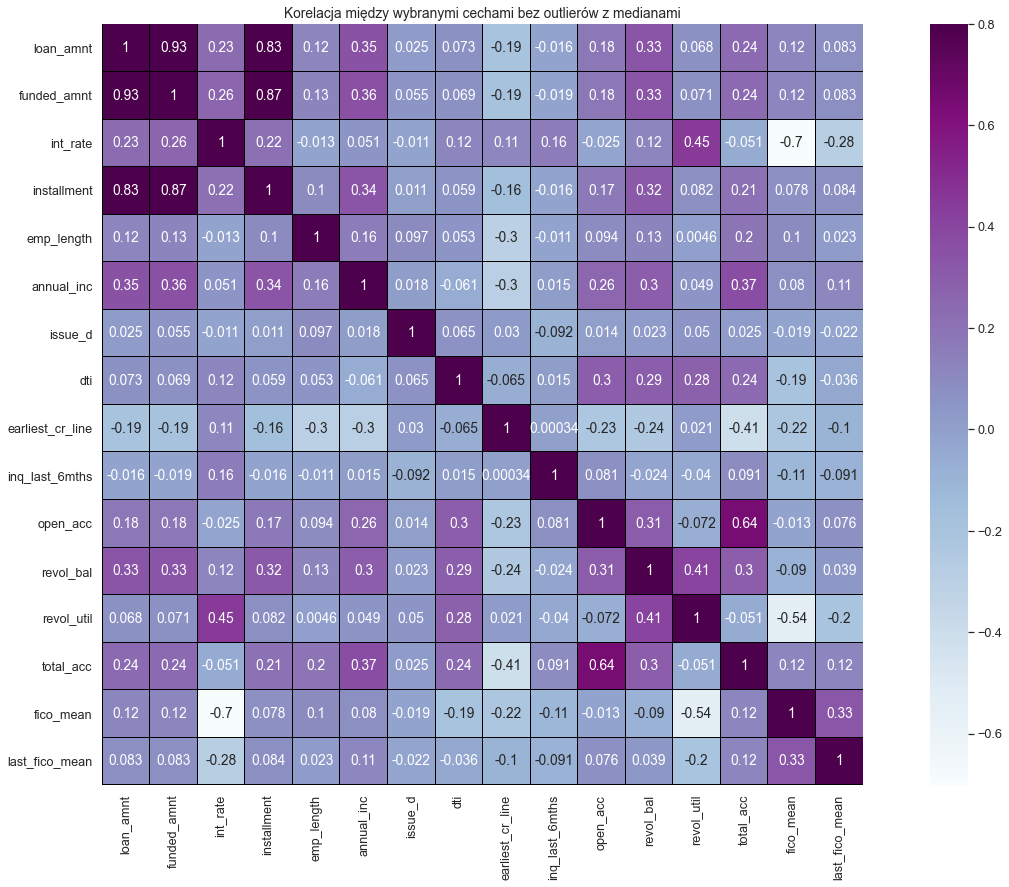

In [193]:
sns.set(font_scale=1.15)
plt.figure(figsize=(24, 14))

sns.heatmap(cor2, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap="BuPu", linecolor="black")
plt.title('Korelacja między wybranymi cechami bez outlierów z medianami');

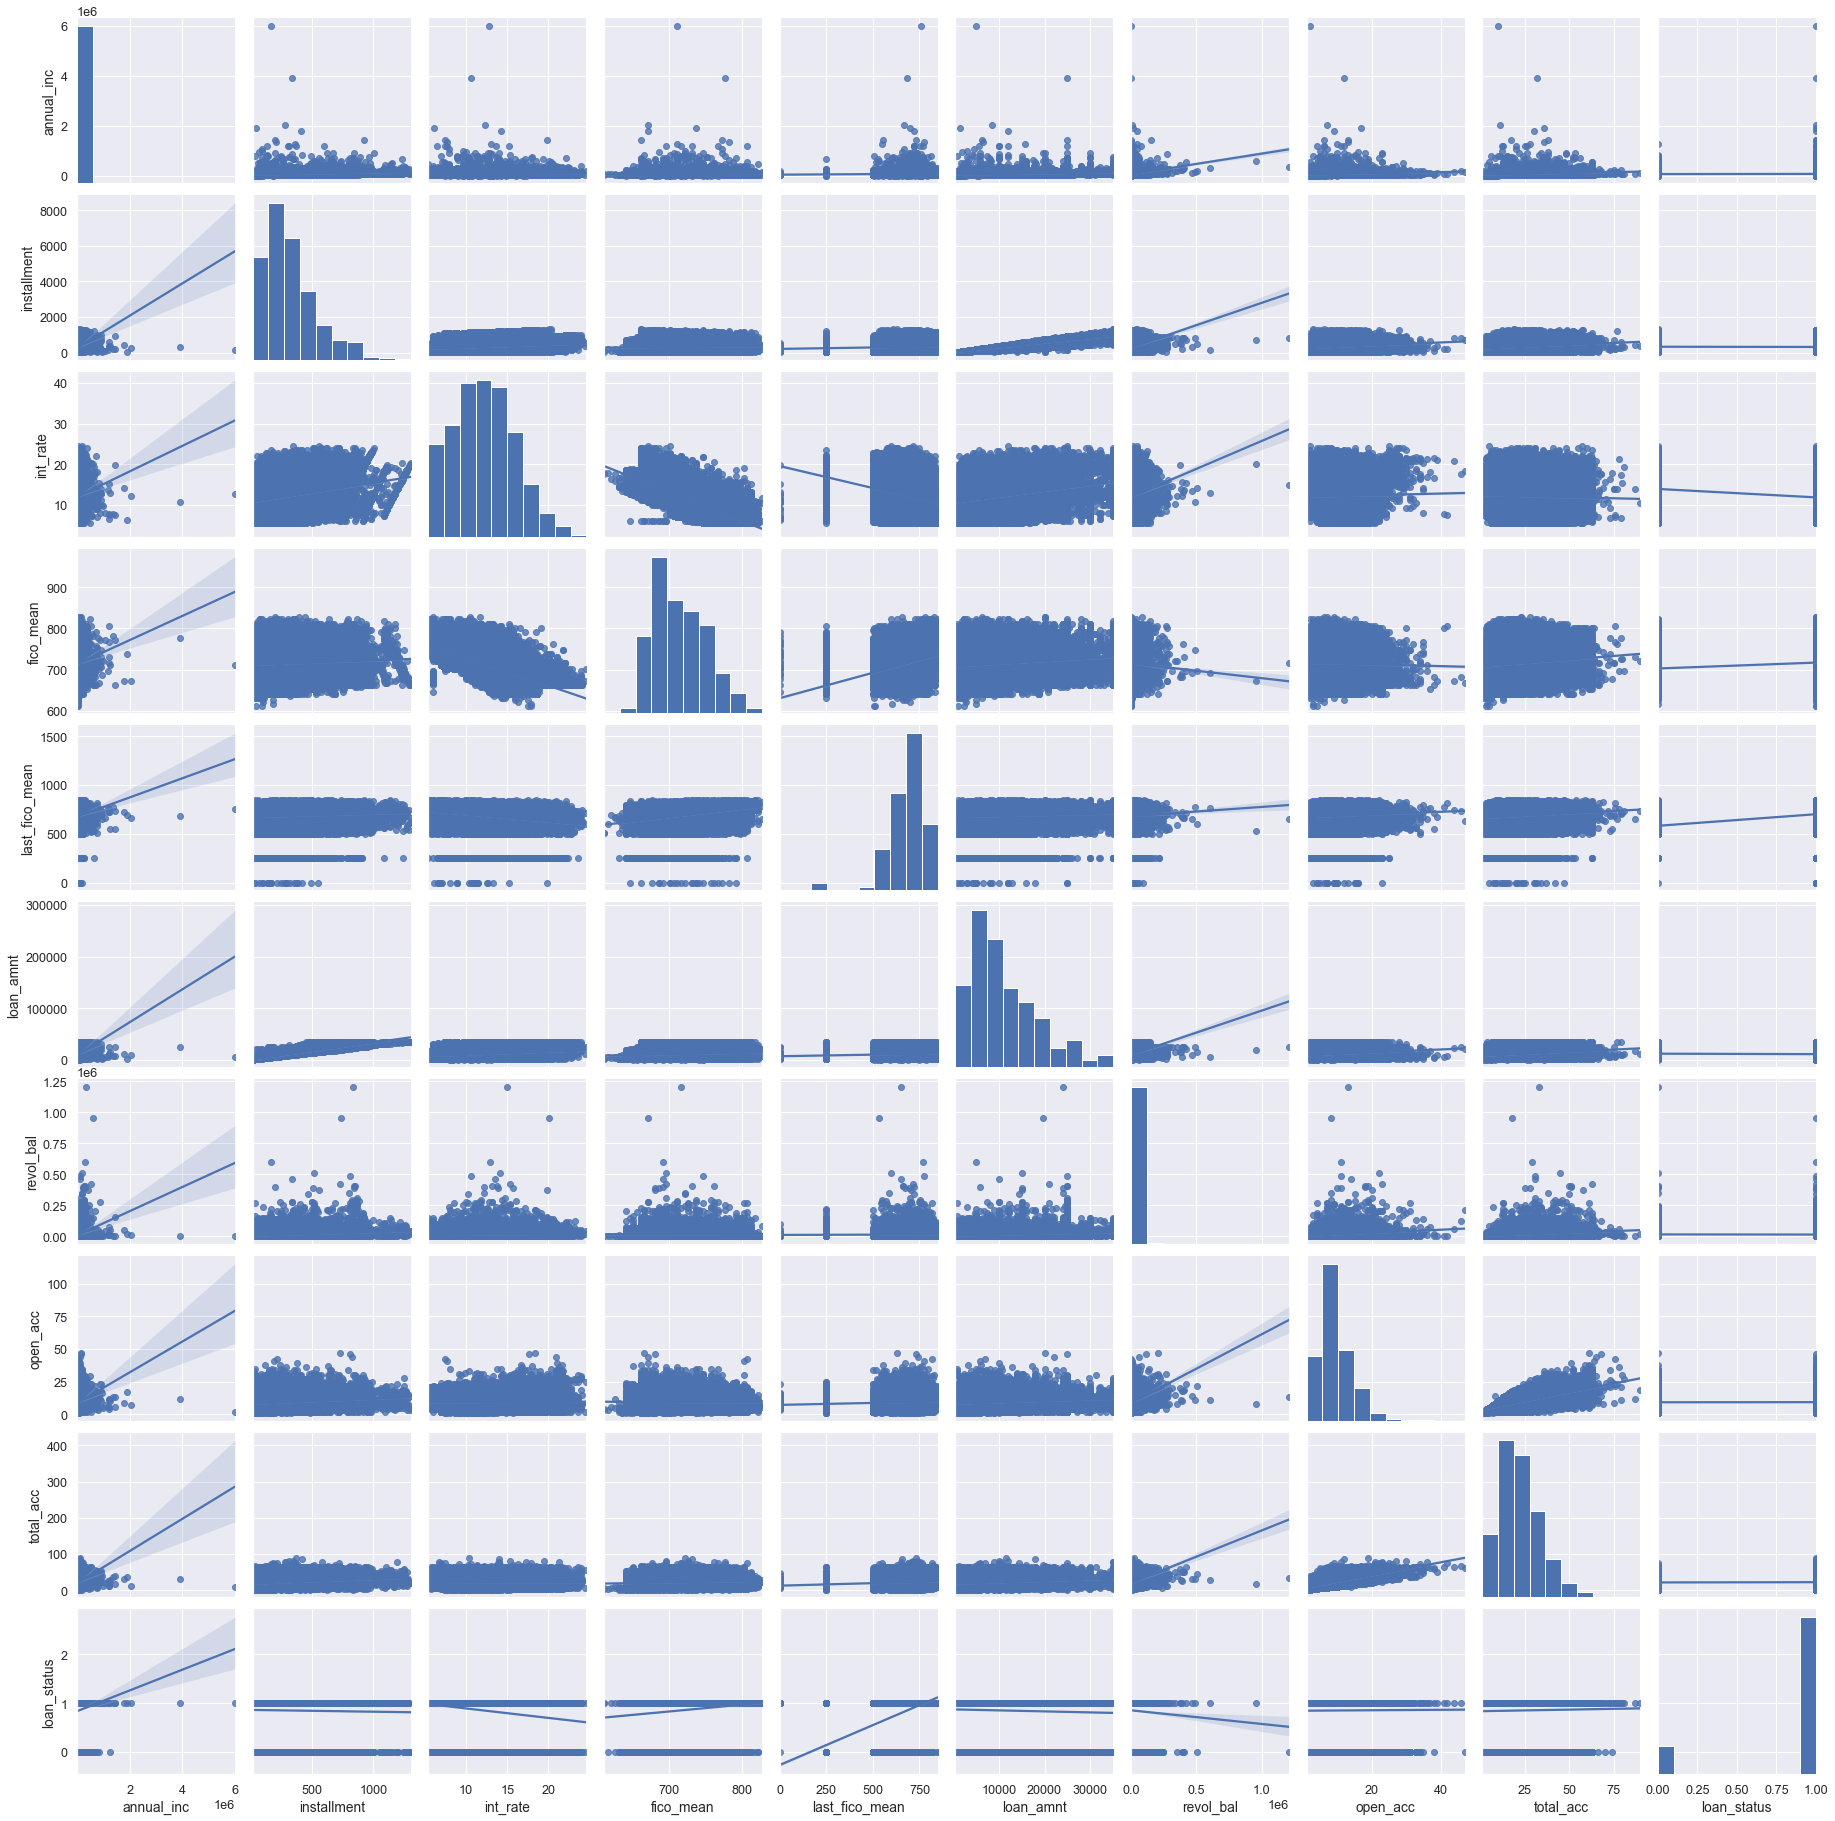

In [194]:
sns.pairplot(data_loan1, kind="reg", palette="husl")

### Encodowanie zmiennych kategorycznych porządkowych: 
sub_grade, term i nowych: loan_amnt_rating, interest_rating, fico_rating

In [195]:
encoder = ce.OrdinalEncoder(cols=['sub_grade', 'term', 'loan_amnt_rating', 'interest_rating', 'fico_rating'])
data_loan = encoder.fit_transform(data_loan)
data_loan

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_mean,last_fico_mean,fico_rating,loan_amnt_rating,interest_rating
0,5000.0,5000.0,1,10.65,162.87,1,10,RENT,24000.0,Verified,...,0.0,13648.0,83.7,9.0,0.0,737.0,737.0,1,1,1
1,2500.0,2500.0,2,15.27,59.83,2,1,RENT,30000.0,Source Verified,...,0.0,1687.0,9.4,4.0,0.0,742.0,249.5,2,2,2
2,2400.0,2400.0,1,15.96,84.33,3,10,RENT,12252.0,Not Verified,...,0.0,2956.0,98.5,10.0,0.0,737.0,737.0,1,2,2
3,10000.0,10000.0,1,13.49,339.31,4,10,RENT,49200.0,Source Verified,...,0.0,5598.0,21.0,37.0,0.0,692.0,602.0,1,3,1
4,3000.0,3000.0,2,12.69,67.79,5,1,RENT,80000.0,Source Verified,...,0.0,27783.0,53.9,38.0,0.0,697.0,682.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,3500.0,3500.0,1,10.28,113.39,4,1,RENT,180000.0,Not Verified,...,0.0,0.0,49.7,20.0,0.0,687.0,817.0,1,2,1
42532,1000.0,1000.0,1,9.64,32.11,14,1,RENT,12000.0,Not Verified,...,0.0,0.0,49.7,20.0,0.0,697.0,782.0,1,2,1
42533,2525.0,2525.0,1,9.33,80.69,13,1,RENT,110000.0,Not Verified,...,0.0,0.0,49.7,20.0,0.0,712.0,712.0,1,2,3
42534,6500.0,6500.0,1,8.38,204.84,18,1,NONE,60000.0,Not Verified,...,0.0,0.0,49.7,20.0,0.0,742.0,722.0,2,1,3


### Encodowanie pozostałych zmiennych kategorycznych One Hot Encoding

In [196]:
data_dummies = pd.get_dummies(data_loan)
data_dummies

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,5000.0,1,10.65,162.87,1,10,24000.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2,15.27,59.83,2,1,30000.0,2011,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,1,15.96,84.33,3,10,12252.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,1,13.49,339.31,4,10,49200.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,2,12.69,67.79,5,1,80000.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,3500.0,3500.0,1,10.28,113.39,4,1,180000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42532,1000.0,1000.0,1,9.64,32.11,14,1,12000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42533,2525.0,2525.0,1,9.33,80.69,13,1,110000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42534,6500.0,6500.0,1,8.38,204.84,18,1,60000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0


In [197]:
data_dummies.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'issue_d', 'loan_status',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_mean',
       'last_fico_mean', 'fico_rating', 'loan_amnt_rating', 'interest_rating',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_va

In [198]:
data_dummies.dtypes

loan_amnt        float64
funded_amnt      float64
term               int64
int_rate         float64
installment      float64
                  ...   
addr_state_VT      uint8
addr_state_WA      uint8
addr_state_WI      uint8
addr_state_WV      uint8
addr_state_WY      uint8
Length: 98, dtype: object

In [199]:
cor = data_dummies.corr()
cor

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
loan_amnt,1.000000,0.981746,0.355647,0.292346,0.930869,0.119626,0.138589,0.276125,0.142493,-0.042582,...,-0.007118,-0.011793,0.017900,0.000111,0.010004,-0.010225,-0.003873,0.000184,-0.003483,0.000242
funded_amnt,0.981746,1.000000,0.335137,0.295154,0.956522,0.115749,0.138117,0.272070,0.152112,-0.039602,...,-0.006992,-0.015116,0.016872,0.000063,0.011842,-0.010569,-0.002099,0.000458,-0.002075,0.000828
term,0.355647,0.335137,1.000000,0.428649,0.097614,0.190461,0.111158,0.043496,0.281890,-0.133646,...,0.003617,-0.016207,-0.011033,0.002065,0.002166,-0.004024,-0.007010,0.011548,0.005385,-0.006537
int_rate,0.292346,0.295154,0.428649,1.000000,0.271433,0.313232,-0.012695,0.054377,0.006153,-0.200598,...,-0.006738,-0.001938,0.002413,0.000201,0.005777,-0.008556,0.006209,0.000731,-0.005369,0.005543
installment,0.930869,0.956522,0.097614,0.271433,1.000000,0.102561,0.108253,0.278342,0.072136,-0.021094,...,-0.009050,-0.012582,0.020323,-0.000956,0.010888,-0.009995,0.000584,-0.002843,-0.005191,0.003201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
addr_state_VT,-0.010225,-0.010569,-0.004024,-0.008556,-0.009995,-0.000909,0.005953,-0.008894,0.002532,0.002903,...,-0.001455,-0.001005,-0.009936,-0.002971,-0.006972,1.000000,-0.005349,-0.004059,-0.002434,-0.001658
addr_state_WA,-0.003873,-0.002099,-0.007010,0.006209,0.000584,-0.000473,0.000559,-0.005645,0.003483,-0.004012,...,-0.005800,-0.004007,-0.039607,-0.011844,-0.027792,-0.005349,1.000000,-0.016181,-0.009703,-0.006611
addr_state_WI,0.000184,0.000458,0.011548,0.000731,-0.002843,0.000552,0.009861,-0.010436,-0.006541,0.000609,...,-0.004402,-0.003041,-0.030058,-0.008988,-0.021092,-0.004059,-0.016181,1.000000,-0.007364,-0.005017
addr_state_WV,-0.003483,-0.002075,0.005385,-0.005369,-0.005191,-0.009206,0.011335,-0.015449,0.006883,0.005231,...,-0.002639,-0.001823,-0.018025,-0.005390,-0.012648,-0.002434,-0.009703,-0.007364,1.000000,-0.003008


### Eksport plików do następnych notebooków

In [200]:
data_loan.to_csv("data_loan.csv")

In [201]:
data_outliers.to_csv("data_outliers.csv")

In [202]:
data_dummies.to_csv("data_dummies.csv")

In [203]:
data_loan1.to_csv("data_loan1.csv")

### Kolejna część w pliku "PCA i klasteryzacja II część projekt końcowy Data Science - Dorota Gawrońska-Popa"

### Łódź 4.10.2020